In [1]:
%pip install matplotlib-venn
%pip install shapely
%pip install factor-analyzer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Task2Responses.csv')

In [4]:
data.columns

Index(['Timestamp', 'What is the case number allocated to you?',
       'What is your age group? ', 'What gender you identify with?  ',
       'What is your highest education Level? ',
       'What is your employment Status? ',
       'How would you rate your computing proficiency? ',
       'Prior to this study, have you ever used generative AI Language tool such as ChatGPT or Gemini?',
       'In what capacity have you used them (LLMs or similar AI technologies)? (Please select all that apply) ',
       '1.        Using ChatGPT helped me accomplish the task more quickly.',
       '2.        Using ChatGPT increased my productivity in completing the task.',
       '3.        Overall, I found ChatGPT useful in completing the task.',
       '4.        ChatGPT provided relevant information that helped me complete the task.',
       '5.        I was confident in the accuracy and reliability of the answers provided by ChatGPT. ',
       '6.        It was very easy to interact with ChatGPT.'

In [5]:
# Rename Columns
data.columns = [
    'timestamp', 
    'CaseNo', 
    'age_group', 
    'gender', 
    'highest_education', 
    'employment_status', 
    'computing_proficiency', 
    'prior_ai_experience', 
    'ai_usage_capacity',
    'PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 
    'EEX1', 'EEX2', 'EEX3', 'EEX4', 
    'SOI1', 'SOI2', 'SOI3', 
    'SEF1', 'SEF2', 'SEF3', 
    'TRU1', 'TRU2', 'TRU3', 
    'ITU', 
    'SAT', 
    'SAT2', 
    'liked_most', 
    'challenges_faced', 
    'suggestions', 
    'consent', 
    'task_completion'
]

print(data.columns)

Index(['timestamp', 'CaseNo', 'age_group', 'gender', 'highest_education',
       'employment_status', 'computing_proficiency', 'prior_ai_experience',
       'ai_usage_capacity', 'PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 'EEX1',
       'EEX2', 'EEX3', 'EEX4', 'SOI1', 'SOI2', 'SOI3', 'SEF1', 'SEF2', 'SEF3',
       'TRU1', 'TRU2', 'TRU3', 'ITU', 'SAT', 'SAT2', 'liked_most',
       'challenges_faced', 'suggestions', 'consent', 'task_completion'],
      dtype='object')


In [6]:
# Dropping the unnecesary columns
df = data.drop(['timestamp', 'consent', 'task_completion', 'SAT2'], axis=1)

print(df.columns)

Index(['CaseNo', 'age_group', 'gender', 'highest_education',
       'employment_status', 'computing_proficiency', 'prior_ai_experience',
       'ai_usage_capacity', 'PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 'EEX1',
       'EEX2', 'EEX3', 'EEX4', 'SOI1', 'SOI2', 'SOI3', 'SEF1', 'SEF2', 'SEF3',
       'TRU1', 'TRU2', 'TRU3', 'ITU', 'SAT', 'liked_most', 'challenges_faced',
       'suggestions'],
      dtype='object')


In [7]:
# Define the allowed case numbers
case_numbers = [1,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,31,32,34,36,38,40,41,42]

# Filter the dataframe to only include rows where the 'CaseNo' column is in the case_numbers list
df = df[df['CaseNo'].isin(case_numbers)]

df.shape

(31, 31)

In [8]:
df = df.sort_values('CaseNo').reset_index(drop=True)

# Insert Participant and ParticipantNo column
df['Participant'] = ['P' + str(i) for i in range(1, len(df) + 1)]
df['ParticipantNo'] = [i for i in range(1, len(df) + 1)]

# Visualize Sample

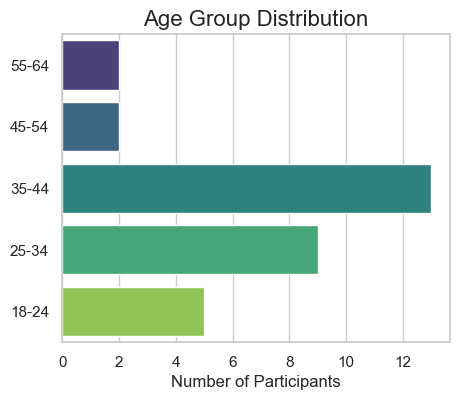

           Count  Percentage
age_group                   
35-44         13   41.935484
25-34          9   29.032258
18-24          5   16.129032
45-54          2    6.451613
55-64          2    6.451613


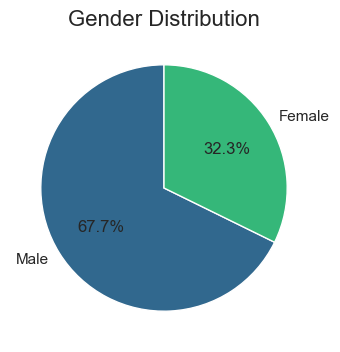

        Count  Percentage
gender                   
Male       21   67.741935
Female     10   32.258065


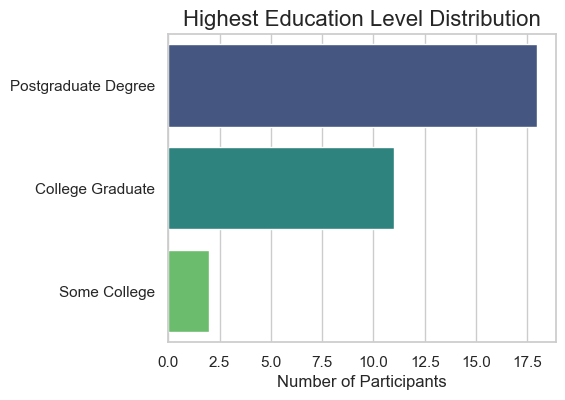

                     Count  Percentage
highest_education                     
Postgraduate Degree     18   58.064516
College Graduate        11   35.483871
Some College             2    6.451613


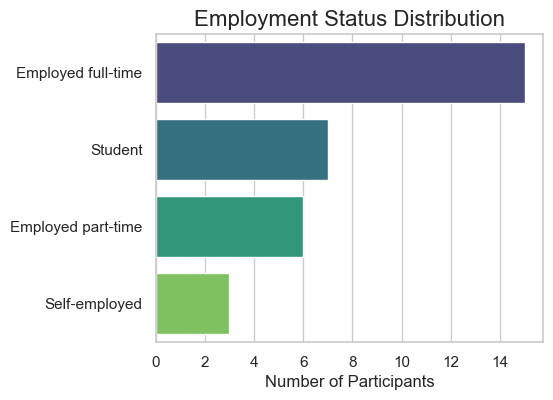

                    Count  Percentage
employment_status                    
Employed full-time     15   48.387097
Student                 7   22.580645
Employed part-time      6   19.354839
Self-employed           3    9.677419


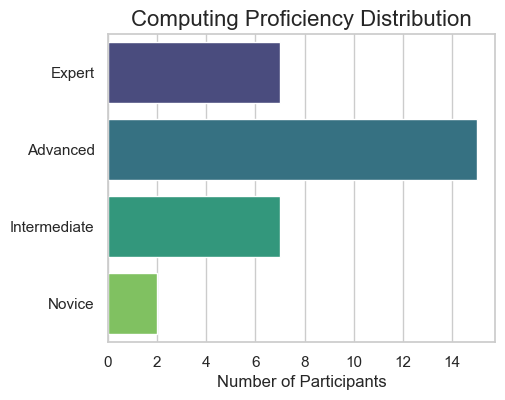

                       Count  Percentage
computing_proficiency                   
Advanced                  15   48.387097
Expert                     7   22.580645
Intermediate               7   22.580645
Novice                     2    6.451613


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Function to create a bar chart for a demographic column
def plot_bar(column, title, xlabel,order):
    plt.figure(figsize=(5, 4))
    sns.countplot(y=column, data=df, palette="viridis", order=order)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('')
    plt.show()

# Function to create a pie chart for a demographic column
def plot_pie(column, title):
    plt.figure(figsize=(4, 4))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df[column].value_counts())))
    plt.title(title, fontsize=16)
    plt.ylabel('')
    plt.show()

# Print a table of counts & Percentages
def print_table(column):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(result)

# Plot for Age Group distribution (Bar chart)
plot_bar('age_group', 'Age Group Distribution', 'Number of Participants',['55-64','45-54','35-44','25-34','18-24'])
print_table('age_group')

# Plot for Gender distribution (Pie chart)
plot_pie('gender', 'Gender Distribution')
print_table('gender')

# Plot for Highest Education Level distribution (Bar chart)
plot_bar('highest_education', 'Highest Education Level Distribution', 'Number of Participants',df['highest_education'].value_counts().index)
print_table('highest_education')

# Plot for Employment Status distribution (Bar chart)
plot_bar('employment_status', 'Employment Status Distribution', 'Number of Participants',df['employment_status'].value_counts().index)
print_table('employment_status')

# Plot for Computing Proficiency (Bar chart)
plot_bar('computing_proficiency', 'Computing Proficiency Distribution', 'Number of Participants',['Expert','Advanced','Intermediate','Novice'])
print_table('computing_proficiency')


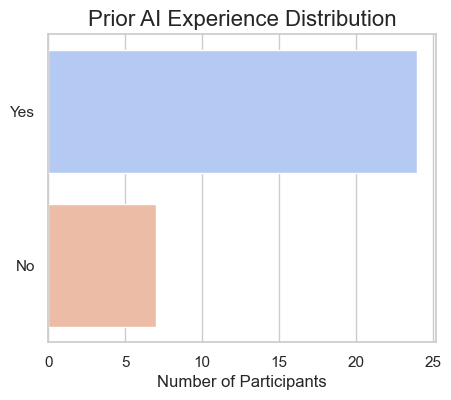

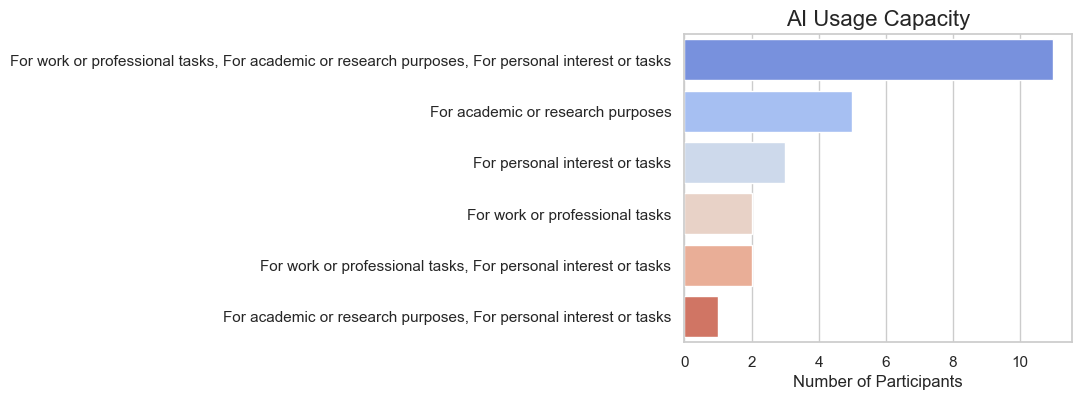

In [10]:

# Function to create a bar chart for categorical data
def plot_categorical(column, title, xlabel):
    plt.figure(figsize=(5, 4))
    sns.countplot(y=column, data=df, palette="coolwarm", order=df[column].value_counts().index)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('')
    plt.show()

def plot_numerical(column, title, xlabel):
    plt.figure(figsize=(5, 4))
    sns.histplot(df[column], kde=True, bins=10, color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency')
    plt.xlim(0, 5)  # Set x-axis limits from 0 to 5
    plt.show()

# Visualizing categorical data using bar charts
plot_categorical('prior_ai_experience', 'Prior AI Experience Distribution', 'Number of Participants')
plot_categorical('ai_usage_capacity', 'AI Usage Capacity', 'Number of Participants')



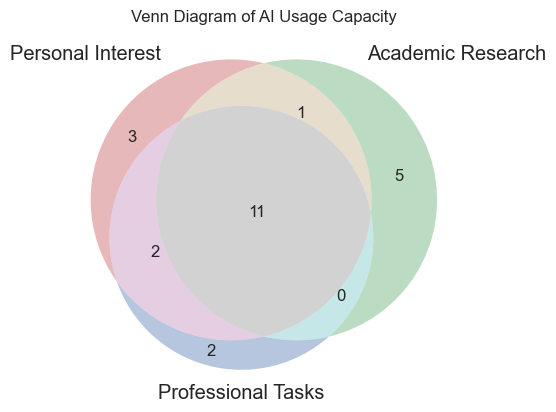

In [11]:
from matplotlib_venn import venn3
from matplotlib_venn.layout.venn3 import cost_based

# Prepare sets based on 'ai_usage_capacity'
set_personal = set(df[df['ai_usage_capacity'].str.contains('For personal interest or tasks', na=False)]['CaseNo'])
set_academic = set(df[df['ai_usage_capacity'].str.contains('For academic or research purposes', na=False)]['CaseNo'])
set_professional = set(df[df['ai_usage_capacity'].str.contains('For work or professional tasks', na=False)]['CaseNo'])
set_nan = set(df[df['ai_usage_capacity'] == '']['CaseNo'])

# Create a Venn Diagram for the three main sets, excluding the 'NaN' set
venn3([set_personal, set_academic, set_professional], ('Personal Interest', 'Academic Research', 'Professional Tasks'))

# Show the plot
plt.title("Venn Diagram of AI Usage Capacity")
plt.show()

In [12]:
# Display all distinct values in the 'future_intent' column
df['ITU'].unique()

array([4, 3, 5])

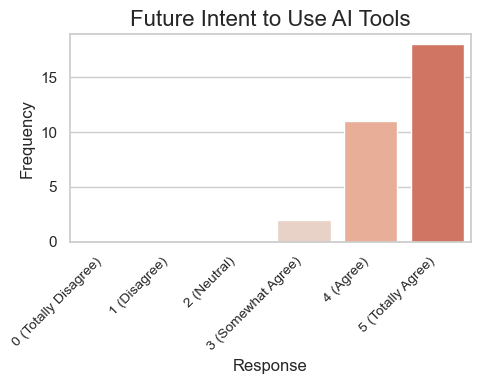

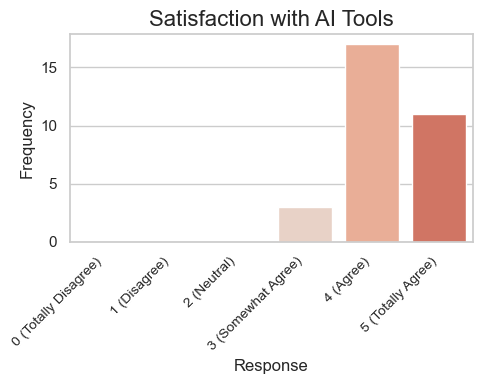

In [13]:

# Create frequency tables for future_intent and satisfaction, but include all Likert values from 0 to 5
def get_full_likert_counts(column):
    # Get the actual counts from the data, reindexing to include all Likert scale values from 0 to 5
    counts = df[column].value_counts().reindex(range(6), fill_value=0)
    return counts

# Function to plot Likert scale distribution with full scale and appropriate labels (0 to 5)
def plot_likert_barplot_full_scale(counts, title, xlabel):
    plt.figure(figsize=(5, 4))
    
    # Create the barplot
    sns.barplot(x=counts.index, y=counts.values, palette="coolwarm")
    
    # Custom tick labels for the Likert scale (0 to 5)
    tick_labels = [
        "0 (Totally Disagree)", 
        "1 (Disagree)", 
        "2 (Neutral)", 
        "3 (Somewhat Agree)", 
        "4 (Agree)", 
        "5 (Totally Agree)"
    ]
    
    # Set the x-ticks, custom labels, and rotate the labels to avoid overlap
    plt.xticks(ticks=counts.index, labels=tick_labels, rotation=45, ha="right", fontsize=10)
    
    # Set plot title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to ensure no overlap
    plt.show()

# Get counts for both future_intent and satisfaction, including 0 to 5
future_intent_counts_full = get_full_likert_counts('ITU')
satisfaction_counts_full = get_full_likert_counts('SAT')

# Plotting for future_intent (0 to 5 scale)
plot_likert_barplot_full_scale(future_intent_counts_full, 'Future Intent to Use AI Tools', 'Response')

# Plotting for satisfaction (0 to 5 scale)
plot_likert_barplot_full_scale(satisfaction_counts_full, 'Satisfaction with AI Tools', 'Response')

## Normality of Data

### Multivariate P-P Plot of Standardized Residuals - Intention to Use

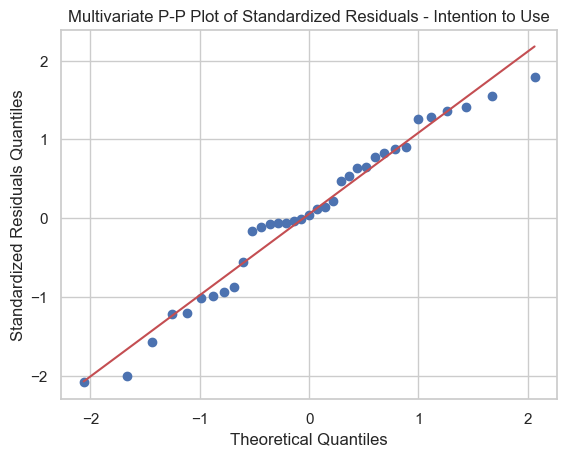

In [14]:

import scipy.stats as stats
import statsmodels.api as sm

# Assuming your dataset is loaded into a DataFrame named 'data'
# Example: data = pd.read_csv('your_dataset.csv')

# Define independent variables and dependent variable
independent_vars = [
    'PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 
    'EEX1', 'EEX2', 'EEX3', 'EEX4', 
    'SOI1', 'SOI2', 'SOI3', 
    'SEF1', 'SEF2', 'SEF3', 
    'TRU1', 'TRU2', 'TRU3'
]
dependent_var = 'ITU'

# Prepare the X and y for regression
X = data[independent_vars]
y = data[dependent_var]

# Add a constant to the independent variables matrix (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the standardized residuals
standardized_residuals = model.get_influence().resid_studentized_internal

# Create a P-P plot for standardized residuals
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Multivariate P-P Plot of Standardized Residuals - Intention to Use')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals Quantiles')
plt.grid(True)
plt.show()


### Multivariate P-P Plot of Standardized Residuals - Satisfaction

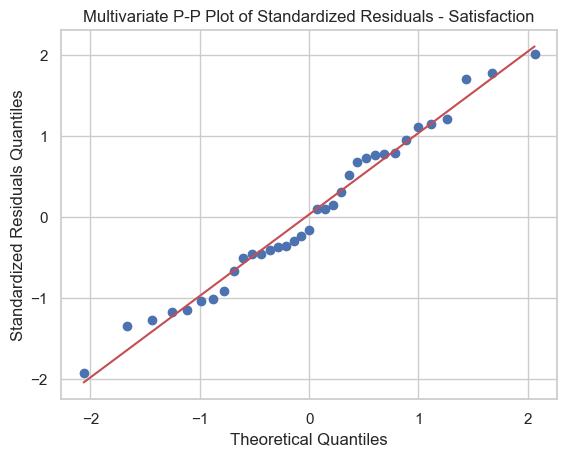

In [15]:
dependent_var = 'SAT'

# Prepare the X and y for regression
X = data[independent_vars]
y = data[dependent_var]

# Add a constant to the independent variables matrix (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the standardized residuals
standardized_residuals = model.get_influence().resid_studentized_internal

# Create a P-P plot for standardized residuals
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Multivariate P-P Plot of Standardized Residuals - Satisfaction')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals Quantiles')
plt.grid(True)
plt.show()

## Pattern Matrix for Exploratory Factor Analysis

Bartlett’s test: 398.12035779486865, p-value: 9.846833470359482e-24
KMO Test (Overall Measure of Sampling Adequacy): 0.5769189913619845
Eigenvalues:
 [5.43949781 3.77119051 2.16841966 1.72940742 1.28128475 0.81581173
 0.52296172 0.46381006 0.4153698  0.34212254 0.26892187 0.23231366
 0.16546971 0.12953369 0.10108267 0.08762402 0.03651929 0.02865909]


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


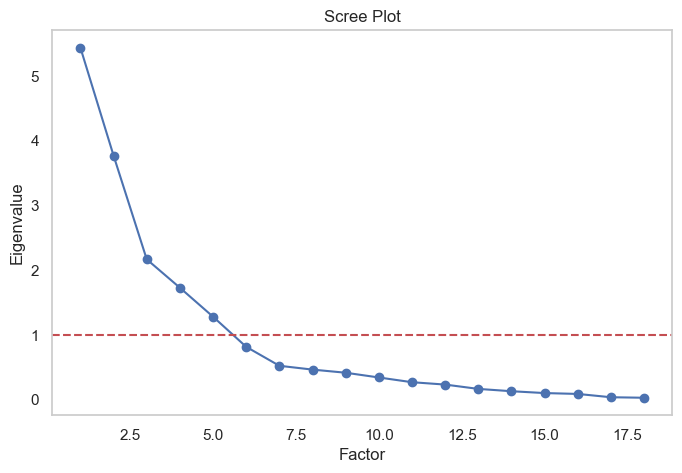

Variance Explained by Each Factor:
 (array([3.05036095, 2.68864546, 2.68044912, 2.58106774, 2.15459021]), array([0.1694645 , 0.14936919, 0.14891384, 0.14339265, 0.11969946]), array([0.1694645 , 0.31883369, 0.46774753, 0.61114018, 0.73083964]))
Communalities:
 [0.70020404 0.5222406  0.73433522 0.67415047 0.68523822 0.98624413
 0.5960704  0.46052896 0.74265527 0.85865396 0.71483822 0.96285466
 0.67966966 0.96276261 0.6566568  0.74123289 0.734318   0.74245937]


In [16]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns for EFA (replace with your actual column names)
cols = ['PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 
        'EEX1', 'EEX2', 'EEX3', 'EEX4', 
        'SOI1', 'SOI2', 'SOI3', 
        'SEF1', 'SEF2', 'SEF3', 
        'TRU1', 'TRU2', 'TRU3']

# Subset the dataframe for factor analysis
df_factor = df[cols]

# Step 1: Check the adequacy of the dataset for factor analysis using Bartlett’s test and KMO test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Bartlett’s test of sphericity
bartlett_test, bartlett_p_value = calculate_bartlett_sphericity(df_factor)
print(f"Bartlett’s test: {bartlett_test}, p-value: {bartlett_p_value}")

# KMO test
kmo_all, kmo_model = calculate_kmo(df_factor)
print(f"KMO Test (Overall Measure of Sampling Adequacy): {kmo_model}")

# Step 2: Perform Factor Analysis
# Instantiate the factor analysis model and specify the number of factors
fa = FactorAnalyzer(n_factors=5, rotation='varimax')

# Fit the factor analysis model
fa.fit(df_factor)

# Step 3: Factor Loadings
# Get the factor loadings (correlations between variables and factors)
factor_loadings = fa.loadings_

# Step 4: Eigenvalues
# Eigenvalues represent the amount of variance explained by each factor
eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:\n", eigenvalues)

# Step 5: Scree plot to determine the number of factors
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # Add a horizontal line at y=1
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Step 6: Display the Variance explained by each factor
variance_explained = fa.get_factor_variance()
print("Variance Explained by Each Factor:\n", variance_explained)

# Optional: You can also view the communalities (proportion of each variable's variance explained by the factors)
communalities = fa.get_communalities()
print("Communalities:\n", communalities)

In [17]:
# Get factor variance information
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

# Create a DataFrame to hold the variance information
variance_df = pd.DataFrame({
    'Number of Factors': [f' {i+1}' for i in range(len(variance))],
    'Variance': variance,
    'Proportional Variance': proportional_variance,
    'Cumulative Variance': cumulative_variance
})

# Display the DataFrame
print(variance_df)

  Number of Factors  Variance  Proportional Variance  Cumulative Variance
0                 1  3.050361               0.169464             0.169464
1                 2  2.688645               0.149369             0.318834
2                 3  2.680449               0.148914             0.467748
3                 4  2.581068               0.143393             0.611140
4                 5  2.154590               0.119699             0.730840


	•	Bartlett’s Test: Since the p-value is very small, the test shows that the dataset has significant correlations between variables, meaning factor analysis is appropriate.
	•	KMO Test: A KMO score of 0.577  means the dataset is suitable for factor analysis, though the results may not be as strong as they would be with a higher KMO score.

Guidelines for KMO Values:

	•	0.90 to 1.00: Excellent.
	•	0.80 to 0.89: Good.
	•	0.70 to 0.79: Average.
	•	0.60 to 0.69: Mediocre/Acceptable.
	•	0.50 to 0.59: Poor.
	•	Below 0.50: Unacceptable (factor analysis should not be used).


https://www.analysisinn.com/post/kmo-and-bartlett-s-test-of-sphericity/#:~:text=KMO%20is%20a%20test%20conducted,plausible%20to%20conduct%20factor%20analysis.

https://bookdown.org/luguben/EFA_in_R/kaiser-meyer-olkin-kmo.html



Varimax Rotation

Since both tests indicate that factor analysis is feasible, we can proceed with running the factor analysis. However, has to consider the limitations (moderate KMO score) when interpreting the factor analysis results

#### **Some factors may not capture the variance as cleanly as desired.**

In [18]:
from factor_analyzer.rotator import Rotator


# Performing EFA with a specified number of factors (e.g., 4)
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df[cols])

# Extracting the unrotated factor loadings
loadings = fa.loadings_

# Applying an oblique rotation (Varimax)
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings)

# Convert the rotated loadings into a DataFrame for readability
pattern_matrix = pd.DataFrame(rotated_loadings, index=cols, 
                              columns=[f'Factor{i+1}' for i in range(rotated_loadings.shape[1])])

# Display the Pattern Matrix
print("Pattern Matrix after Varimax Rotation:")
print(pattern_matrix)

Pattern Matrix after Varimax Rotation:
       Factor1   Factor2   Factor3   Factor4   Factor5
PEX1  0.261727  0.044003 -0.004047  0.475092  0.635640
PEX2  0.065394  0.101182 -0.115639  0.641943  0.286816
PEX3  0.068564 -0.059594  0.119236  0.277990  0.796610
PEX4  0.195454 -0.085417  0.242384  0.039972  0.753860
PEX5  0.266478 -0.235809  0.581256 -0.099837  0.459125
EEX1  0.109170  0.135559  0.048414  0.965351  0.147323
EEX2  0.455017 -0.070487 -0.107907  0.544760  0.275054
EEX3  0.355891  0.238036  0.161948  0.495754 -0.072179
EEX4  0.636833  0.149310  0.184232  0.529671 -0.017666
SOI1  0.058788  0.914393 -0.049549  0.119901  0.047463
SOI2  0.005905  0.788283 -0.205115  0.067907 -0.216170
SOI3  0.114837  0.962162 -0.084857  0.129193 -0.004335
SEF1  0.739467  0.260915  0.160231  0.093062  0.174492
SEF2  0.939544 -0.048020 -0.090055  0.216448  0.150842
SEF3  0.789313 -0.025709 -0.004421  0.075626  0.165051
TRU1  0.098271 -0.188638  0.825961  0.047949  0.107144
TRU2  0.084843 -0.089727  

Promax rotation

In [19]:


# Performing EFA with a specified number of factors (e.g., 4)
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df[cols])

# Extracting the unrotated factor loadings
loadings = fa.loadings_

# Applying an oblique rotation (Promax)
rotator = Rotator(method='promax')
rotated_loadings = rotator.fit_transform(loadings)

# Convert the rotated loadings into a DataFrame for readability
pattern_matrix = pd.DataFrame(rotated_loadings, index=cols, 
                              columns=[f'Factor{i+1}' for i in range(rotated_loadings.shape[1])])

# Display the Pattern Matrix
print("Pattern Matrix after Promax Rotation:")
print(pattern_matrix)

Pattern Matrix after Promax Rotation:
       Factor1   Factor2   Factor3   Factor4   Factor5
PEX1  0.075544  0.058448 -0.086719  0.392631  0.610193
PEX2 -0.146959  0.017606 -0.111162  0.683960  0.240980
PEX3 -0.119561  0.038732  0.015373  0.201573  0.829467
PEX4  0.093669  0.054168  0.114486 -0.100389  0.782195
PEX5  0.231548 -0.121005  0.480552 -0.209881  0.412161
EEX1 -0.191061 -0.036785  0.103675  1.077231  0.020916
EEX2  0.344205 -0.166664 -0.164454  0.493904  0.153462
EEX3  0.249113  0.124016  0.196260  0.478400 -0.193652
EEX4  0.560522  0.019723  0.176628  0.450664 -0.197498
SOI1 -0.012542  0.956577  0.008922 -0.008972  0.153367
SOI2 -0.001570  0.774333 -0.120356 -0.003032 -0.132802
SOI3  0.058101  0.990601 -0.022085 -0.012059  0.093387
SEF1  0.780669  0.265501  0.084187 -0.139624  0.083277
SEF2  1.019386 -0.120012 -0.205978 -0.004574 -0.017344
SEF3  0.875046 -0.050720 -0.112386 -0.135983  0.040804
TRU1  0.013242 -0.151351  0.821056  0.062553  0.008924
TRU2  0.009209 -0.035310  0

### Optimize Pattern Matrix by reducing components

In [20]:
from factor_analyzer import calculate_kmo

# Define a function to calculate KMO for a given dataframe
def check_kmo(df):
    kmo_all, kmo_model = calculate_kmo(df)
    return kmo_model

# Calculate the initial KMO value for the full dataset
df_kmo = df[cols]
initial_kmo = check_kmo(df_kmo)
print(f"Initial KMO: {initial_kmo:.4f}")

# Loop through each column, removing one at a time and calculating KMO
best_kmo = initial_kmo
best_columns = cols

for col in cols:
    temp_columns = [c for c in cols if c != col]
    temp_df = df[temp_columns]
    kmo_value = check_kmo(temp_df)
    print(f"KMO after removing '{col}': {kmo_value:.4f}")
    
    # Check if the new KMO is better than the best KMO so far
    if kmo_value > best_kmo:
        best_kmo = kmo_value
        best_columns = temp_columns

print(f"\nBest KMO: {best_kmo:.4f}")
print(f"Columns for best KMO: {best_columns}")

Initial KMO: 0.5769
KMO after removing 'PEX1': 0.5478
KMO after removing 'PEX2': 0.5587
KMO after removing 'PEX3': 0.5801
KMO after removing 'PEX4': 0.5579
KMO after removing 'PEX5': 0.6531
KMO after removing 'EEX1': 0.5757
KMO after removing 'EEX2': 0.5610
KMO after removing 'EEX3': 0.6654
KMO after removing 'EEX4': 0.6419
KMO after removing 'SOI1': 0.5606
KMO after removing 'SOI2': 0.5645
KMO after removing 'SOI3': 0.5669
KMO after removing 'SEF1': 0.5543
KMO after removing 'SEF2': 0.6075
KMO after removing 'SEF3': 0.6510
KMO after removing 'TRU1': 0.6223
KMO after removing 'TRU2': 0.5938
KMO after removing 'TRU3': 0.6602

Best KMO: 0.6654
Columns for best KMO: ['PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 'EEX1', 'EEX2', 'EEX4', 'SOI1', 'SOI2', 'SOI3', 'SEF1', 'SEF2', 'SEF3', 'TRU1', 'TRU2', 'TRU3']


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-package

In [21]:
# Specify the columns for EFA (replace with your actual column names)
cols = ['PEX1', 'PEX2', 'PEX3', 'PEX4', 
        'EEX1', 'EEX2', 'EEX3', 
        'SOI1', 'SOI2', 'SOI3', 
        'SEF1', 'SEF2', 'SEF3', 
        'TRU1', 'TRU2', 'TRU3']


# Define a function to calculate KMO for a given dataframe
def check_kmo(df):
    kmo_all, kmo_model = calculate_kmo(df)
    return kmo_model

# Calculate the initial KMO value for the full dataset
df_kmo = df[cols]
initial_kmo = check_kmo(df_kmo)
print(f"Initial KMO: {initial_kmo:.4f}")

# Loop through each column, removing one at a time and calculating KMO
best_kmo = initial_kmo
best_columns = cols

for col in cols:
    temp_columns = [c for c in cols if c != col]
    temp_df = df[temp_columns]
    kmo_value = check_kmo(temp_df)
    print(f"KMO after removing '{col}': {kmo_value:.4f}")
    
    # Check if the new KMO is better than the best KMO so far
    if kmo_value > best_kmo:
        best_kmo = kmo_value
        best_columns = temp_columns

print(f"\nBest KMO: {best_kmo:.4f}")
print(f"Columns for best KMO: {best_columns}")

Initial KMO: 0.6544
KMO after removing 'PEX1': 0.6286


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO after removing 'PEX2': 0.6481
KMO after removing 'PEX3': 0.6279
KMO after removing 'PEX4': 0.6467
KMO after removing 'EEX1': 0.6205
KMO after removing 'EEX2': 0.6369
KMO after removing 'EEX3': 0.6511
KMO after removing 'SOI1': 0.6481
KMO after removing 'SOI2': 0.6556
KMO after removing 'SOI3': 0.6521
KMO after removing 'SEF1': 0.6350
KMO after removing 'SEF2': 0.6393
KMO after removing 'SEF3': 0.6419
KMO after removing 'TRU1': 0.6380
KMO after removing 'TRU2': 0.6483
KMO after removing 'TRU3': 0.6418

Best KMO: 0.6556
Columns for best KMO: ['PEX1', 'PEX2', 'PEX3', 'PEX4', 'EEX1', 'EEX2', 'EEX3', 'SOI1', 'SOI3', 'SEF1', 'SEF2', 'SEF3', 'TRU1', 'TRU2', 'TRU3']


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-package

In [22]:

# Specify the columns for EFA (replace with your actual column names)
cols = ['PEX1', 'PEX3', 'PEX4', 
        'EEX1', 'EEX2', 'EEX3', 
        'SOI1', 'SOI2', 'SOI3', 
        'SEF1', 'SEF2', 'SEF3', 
        'TRU1', 'TRU2', 'TRU3']

# Performing EFA with a specified number of factors (e.g., 4)
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df[cols])

# Extracting the unrotated factor loadings
loadings = fa.loadings_

# Applying an oblique rotation (Varimax)
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings)

# Convert the rotated loadings into a DataFrame for readability
pattern_matrix = pd.DataFrame(rotated_loadings, index=cols, 
                              columns=[f'Factor{i+1}' for i in range(rotated_loadings.shape[1])])

# Display the Pattern Matrix
print("Pattern Matrix after Varimax Rotation:")
print(pattern_matrix)

Pattern Matrix after Varimax Rotation:
       Factor1   Factor2   Factor3   Factor4   Factor5
PEX1  0.356293  0.053555 -0.001021  0.278538  0.668507
PEX3  0.163600 -0.053617  0.095496  0.068006  0.852868
PEX4 -0.000150 -0.088381  0.217225  0.199953  0.733775
EEX1  0.948758  0.144824  0.025910  0.065105  0.262970
EEX2  0.564947 -0.064082 -0.134063  0.428642  0.325747
EEX3  0.577975  0.241337  0.111425  0.263841 -0.000736
SOI1  0.127348  0.916518 -0.045693  0.035040  0.058859
SOI2  0.096288  0.794557 -0.193855 -0.007966 -0.222791
SOI3  0.081840  0.964684 -0.061044  0.109194  0.018981
SEF1  0.165591  0.263680  0.158630  0.732438  0.154326
SEF2  0.236497 -0.035865 -0.082180  0.954459  0.158413
SEF3  0.073391 -0.012804 -0.006992  0.785078  0.149808
TRU1  0.082848 -0.199839  0.792217  0.082516  0.128739
TRU2 -0.070402 -0.095748  0.878808  0.100562  0.111262
TRU3  0.046581  0.022140  0.855075 -0.150325  0.045349


To interpret the output of the Pattern Matrix after Promax rotation, let’s break it down step by step. The matrix shows how strongly each item (question or variable) loads onto each of the five factors. Loadings close to 1 or -1 indicate a strong relationship between the item and the factor, while loadings close to 0 suggest little to no relationship.

Key points to look at:

	1.	Factor Loadings:
	•	Loadings above 0.3 or below -0.3 are typically considered significant.
	•	For each row (variable), we look for the largest loading to identify which factor that variable is most strongly associated with.
	2.	Interpretation of the factors:
	•	We identify which items load strongly onto each factor. Based on the items’ meanings, we can interpret what each factor represents.

Conclusion:

The output suggests that the items are grouped into five distinct factors, each representing a different construct (Self-Efficacy, Social Influence, Trust, Effort Expectancy, and Performance Expectancy). Each variable loads most strongly onto the factor that it is conceptually aligned with, indicating a clear factor structure after rotation.

### Test the reduced Pattern Matrix

Bartlett’s test: 295.7258319989731, p-value: 4.652865213484557e-20
KMO Test (Overall Measure of Sampling Adequacy): 0.6480816593172546
Eigenvalues:
 [4.41302614 3.29119387 2.12798821 1.4633203  1.14395217 0.52151731
 0.46876751 0.39944121 0.30469079 0.24817677 0.23514728 0.1572933
 0.10751357 0.0759611  0.04201048]


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


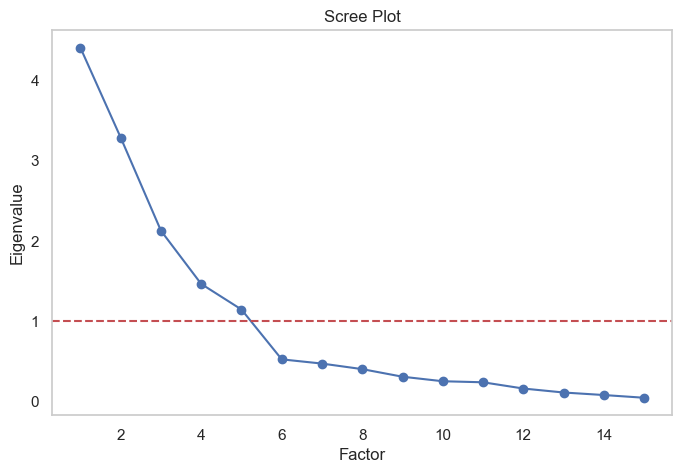

Variance Explained by Each Factor:
 (array([2.61939087, 2.49631236, 2.29379183, 2.04379978, 1.8419863 ]), array([0.17462606, 0.16642082, 0.15291946, 0.13625332, 0.12279909]), array([0.17462606, 0.34104688, 0.49396634, 0.63021966, 0.75301874]))
Communalities:
 [0.65429903 0.77076786 0.63340454 0.99517827 0.63109045 0.47432731
 0.86300315 0.7278709  0.95332319 0.68239364 1.00005675 0.64438864
 0.6977899  0.80891979 0.75846771]


In [23]:
# Subset the dataframe for factor analysis
df_factor = df[cols]

# Step 1: Check the adequacy of the dataset for factor analysis using Bartlett’s test and KMO test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Bartlett’s test of sphericity
bartlett_test, bartlett_p_value = calculate_bartlett_sphericity(df_factor)
print(f"Bartlett’s test: {bartlett_test}, p-value: {bartlett_p_value}")

# KMO test
kmo_all, kmo_model = calculate_kmo(df_factor)
print(f"KMO Test (Overall Measure of Sampling Adequacy): {kmo_model}")

# Step 2: Perform Factor Analysis
# Instantiate the factor analysis model and specify the number of factors
fa = FactorAnalyzer(n_factors=5, rotation='varimax')

# Fit the factor analysis model
fa.fit(df_factor)

# Step 3: Factor Loadings
# Get the factor loadings (correlations between variables and factors)
factor_loadings = fa.loadings_

# Step 4: Eigenvalues
# Eigenvalues represent the amount of variance explained by each factor
eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:\n", eigenvalues)

# Step 5: Scree plot to determine the number of factors
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # Add a horizontal line at y=1
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Step 6: Display the Variance explained by each factor
variance_explained = fa.get_factor_variance()
print("Variance Explained by Each Factor:\n", variance_explained)

# Optional: You can also view the communalities (proportion of each variable's variance explained by the factors)
communalities = fa.get_communalities()
print("Communalities:\n", communalities)

## Variance Explained by Each Factor

In [24]:
# Get factor variance information
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

# Create a DataFrame to hold the variance information
variance_df = pd.DataFrame({
    'Number of Factors': [f' {i+1}' for i in range(len(variance))],
    'Variance': variance,
    'Proportional Variance': proportional_variance,
    'Cumulative Variance': cumulative_variance,
    'Cumulative Variance Percentage': (cumulative_variance * 100).round(2)
})

# Display the DataFrame
print(variance_df)

  Number of Factors  Variance  Proportional Variance  Cumulative Variance  \
0                 1  2.619391               0.174626             0.174626   
1                 2  2.496312               0.166421             0.341047   
2                 3  2.293792               0.152919             0.493966   
3                 4  2.043800               0.136253             0.630220   
4                 5  1.841986               0.122799             0.753019   

   Cumulative Variance Percentage  
0                           17.46  
1                           34.10  
2                           49.40  
3                           63.02  
4                           75.30  


### Communalities

In [25]:
communalities = fa.get_communalities()

# Create a DataFrame to display commonalities
communalities_df = pd.DataFrame({
    'Variable': cols,
    'Communality': communalities
})

# Display the DataFrame
print(communalities_df)

   Variable  Communality
0      PEX1     0.654299
1      PEX3     0.770768
2      PEX4     0.633405
3      EEX1     0.995178
4      EEX2     0.631090
5      EEX3     0.474327
6      SOI1     0.863003
7      SOI2     0.727871
8      SOI3     0.953323
9      SEF1     0.682394
10     SEF2     1.000057
11     SEF3     0.644389
12     TRU1     0.697790
13     TRU2     0.808920
14     TRU3     0.758468


In [26]:
communalities_df['Communality']=communalities_df['Communality'].round(3)

# Save the commonalities DataFrame to an Excel file
communalities_df.to_excel('communalities_table.xlsx', index=False)

In [27]:
communalities_df.Communality.min()

0.474

In [28]:
communalities_df.Communality.max()

1.0

## Cronbach’s Alpha values for the study constructs

In [29]:
import pandas as pd
import numpy as np

# Function to calculate Cronbach's Alpha
def cronbach_alpha(df):
    # Number of items (questions)
    items = df.shape[1]
    
    # Variance of total scores (row-wise sum of items)
    variance_total = df.sum(axis=1).var(ddof=1)
    
    # Variance of each item (column-wise variance)
    variances = df.var(axis=0, ddof=1)
    
    # Cronbach's Alpha formula
    alpha = (items / (items - 1)) * (1 - variances.sum() / variance_total)
    
    return alpha

# Assuming df is your DataFrame containing the survey data
# Calculate Cronbach's Alpha for each construct

# Performance Expectancy columns
PEX_cols = ['PEX1', 'PEX3', 'PEX4']
alpha_PEX = cronbach_alpha(df[PEX_cols])
print(f"Cronbach's Alpha for PEX: {alpha_PEX:.4f}")

# Effort Expectancy columns
EEX_cols = ['EEX1', 'EEX2', 'EEX3']
alpha_EEX = cronbach_alpha(df[EEX_cols])
print(f"Cronbach's Alpha for EEX: {alpha_EEX:.4f}")

# Social Influence columns
SOI_cols = ['SOI1', 'SOI2', 'SOI3']
alpha_SOI = cronbach_alpha(df[SOI_cols])
print(f"Cronbach's Alpha for SOI: {alpha_SOI:.4f}")

# Self-Efficacy columns
SEF_cols = ['SEF1', 'SEF2', 'SEF3']
alpha_SEF = cronbach_alpha(df[SEF_cols])
print(f"Cronbach's Alpha for SEF: {alpha_SEF:.4f}")

# Trust columns
TRU_cols = ['TRU1', 'TRU2', 'TRU3']
alpha_TRU = cronbach_alpha(df[TRU_cols])
print(f"Cronbach's Alpha for TRU: {alpha_TRU:.4f}")

Cronbach's Alpha for PEX: 0.8280
Cronbach's Alpha for EEX: 0.7786
Cronbach's Alpha for SOI: 0.9236
Cronbach's Alpha for SEF: 0.8799
Cronbach's Alpha for TRU: 0.8808


Cronbach's Alpha for PEX: 0.8280

Cronbach's Alpha for EEX: 0.7786

Cronbach's Alpha for SOI: 0.9236

Cronbach's Alpha for SEF: 0.8799

Cronbach's Alpha for TRU: 0.8808


### Copy to DataFrame

In [30]:

# Define constructs and associated columns
constructs = {
    'Performance Expectancy (PEX)': ['PEX1', 'PEX3', 'PEX4'],
    'Effort Expectancy (EEX)': ['EEX1', 'EEX2', 'EEX3'],
    'Social Influence (SOI)': ['SOI1', 'SOI2', 'SOI3'],
    'Self-Efficacy (SEF)': ['SEF1', 'SEF2', 'SEF3'],
    'Trust (TRU)': ['TRU1', 'TRU2', 'TRU3']
}

# Calculate Cronbach's Alpha for each construct and store in a dictionary
alpha_values = {construct: cronbach_alpha(df[cols]) for construct, cols in constructs.items()}

# Convert the dictionary to a DataFrame
alpha_df = pd.DataFrame(list(alpha_values.items()), columns=['Construct', 'Cronbach\'s Alpha'])

# Display the DataFrame
print(alpha_df)


                      Construct  Cronbach's Alpha
0  Performance Expectancy (PEX)          0.827952
1       Effort Expectancy (EEX)          0.778584
2        Social Influence (SOI)          0.923628
3           Self-Efficacy (SEF)          0.879908
4                   Trust (TRU)          0.880798


In [31]:
factor_names=['EEX','SOI','TRU','SEF','PEX']
transformed_df=pd.DataFrame(fa.transform(df_factor),columns=factor_names)
transformed_df.describe()

,EEX,SOI,TRU,SEF,PEX
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,-1.642951e-16,2.435328e-16,-1.038596e-16,4.870656e-16,-9.633871e-16
std,1.003746e+00,1.028635e+00,9.651968e-01,9.360889e-01,1.031266e+00
min,-2.255179e+00,-2.561626e+00,-2.357885e+00,-2.341342e+00,-2.635332e+00
25%,-5.290416e-01,-6.747630e-01,-6.117907e-01,-2.741755e-01,-7.080732e-01
50%,1.827715e-01,2.176774e-01,-3.464023e-02,3.062208e-01,3.444786e-01
75%,4.564240e-01,8.339435e-01,6.617542e-01,7.133478e-01,7.845933e-01
max,1.637384e+00,1.599247e+00,2.066434e+00,9.840826e-01,1.348685e+00


In [32]:
transformed_df.mean().round(2)

EEX   -0.0
SOI    0.0
TRU   -0.0
SEF    0.0
PEX   -0.0
dtype: float64

In [33]:
transformed_df.std().round(2)

EEX    1.00
SOI    1.03
TRU    0.97
SEF    0.94
PEX    1.03
dtype: float64

In [34]:
transformed_df.head()

,EEX,SOI,TRU,SEF,PEX
0,0.182772,0.952063,0.055825,-0.724946,0.879498
1,0.435111,-0.714396,-0.662031,-0.184378,-0.851861
2,-0.591977,0.640265,-0.746640,0.707631,0.638797
3,-1.170715,0.741935,-0.521045,0.306221,-0.913555
4,0.359166,-0.007896,0.429510,-0.340115,0.549950


In [35]:
# Create a new column 'PEX_mean' that calculates the row-wise mean of the 3 PEX columns
df['PEX_mean'] = df[['PEX1', 'PEX3', 'PEX4']].mean(axis=1)

# Calculate the mean for EEX
df['EEX_mean'] = df[['EEX1', 'EEX2', 'EEX3']].mean(axis=1)

# Calculate the mean for SOI
df['SOI_mean'] = df[['SOI1', 'SOI2', 'SOI3']].mean(axis=1)

# Calculate the mean for Self-Efficacy
df['SEF_mean'] = df[['SEF1', 'SEF2', 'SEF3']].mean(axis=1)

# Calculate the mean for TRU
df['TRU_mean'] = df[['TRU1', 'TRU2', 'TRU3']].mean(axis=1)

# Display the dataframe with all the new mean columns
print(df[['CaseNo','EEX_mean', 'SOI_mean', 'SEF_mean', 'TRU_mean']])

    CaseNo  EEX_mean  SOI_mean  SEF_mean  TRU_mean
0        1  5.000000  4.000000  5.000000  3.333333
1        3  4.000000  4.000000  3.000000  3.000000
2        6  5.000000  3.000000  4.666667  3.000000
3        7  4.333333  2.000000  4.333333  3.000000
4        8  5.000000  4.000000  4.000000  3.666667
5        9  5.000000  3.666667  4.333333  1.666667
6       10  5.000000  4.000000  5.000000  2.000000
7       11  3.333333  2.000000  3.666667  3.666667
8       12  4.000000  1.666667  4.666667  4.333333
9       13  3.333333  5.000000  2.666667  3.000000
10      14  4.666667  3.000000  5.000000  2.666667
11      15  5.000000  4.333333  4.666667  4.000000
12      16  3.666667  3.000000  4.000000  3.000000
13      17  4.666667  4.666667  4.666667  4.333333
14      18  5.000000  3.666667  5.000000  4.000000
15      19  5.000000  3.333333  5.000000  4.000000
16      20  5.000000  2.333333  3.666667  3.000000
17      21  5.000000  4.000000  4.000000  3.000000
18      22  4.666667  0.666667 

In [36]:
# Drop the individual columns that contribute to the mean columns
df = df.drop(['PEX1', 'PEX2', 'PEX3', 'PEX4', 'PEX5', 
        'EEX1', 'EEX2', 'EEX3', 'EEX4', 
        'SOI1', 'SOI2', 'SOI3', 
        'SEF1', 'SEF2', 'SEF3', 
        'TRU1', 'TRU2', 'TRU3'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNo                 31 non-null     int64  
 1   age_group              31 non-null     object 
 2   gender                 31 non-null     object 
 3   highest_education      31 non-null     object 
 4   employment_status      31 non-null     object 
 5   computing_proficiency  31 non-null     object 
 6   prior_ai_experience    31 non-null     object 
 7   ai_usage_capacity      24 non-null     object 
 8   ITU                    31 non-null     int64  
 9   SAT                    31 non-null     int64  
 10  liked_most             31 non-null     object 
 11  challenges_faced       31 non-null     object 
 12  suggestions            26 non-null     object 
 13  Participant            31 non-null     object 
 14  ParticipantNo          31 non-null     int64  
 15  PEX_mean

In [37]:
merged_df = pd.concat([df, transformed_df], axis=1)
merged_df.columns

Index(['CaseNo', 'age_group', 'gender', 'highest_education',
       'employment_status', 'computing_proficiency', 'prior_ai_experience',
       'ai_usage_capacity', 'ITU', 'SAT', 'liked_most', 'challenges_faced',
       'suggestions', 'Participant', 'ParticipantNo', 'PEX_mean', 'EEX_mean',
       'SOI_mean', 'SEF_mean', 'TRU_mean', 'EEX', 'SOI', 'TRU', 'SEF', 'PEX'],
      dtype='object')

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


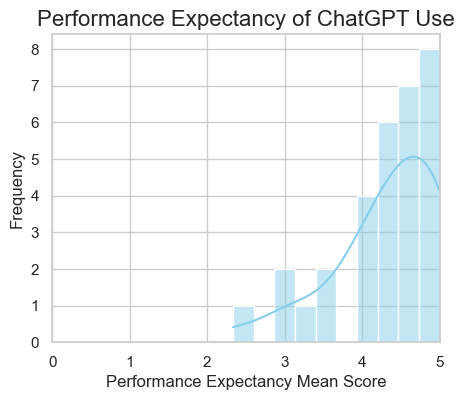

In [38]:
plot_numerical('PEX_mean', 'Performance Expectancy of ChatGPT Use', 'Performance Expectancy Mean Score')

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


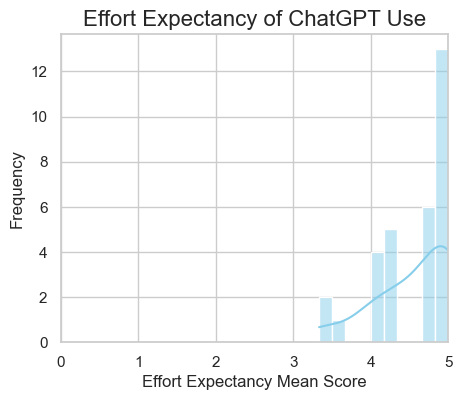

In [39]:
plot_numerical('EEX_mean', 'Effort Expectancy of ChatGPT Use', 'Effort Expectancy Mean Score')

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


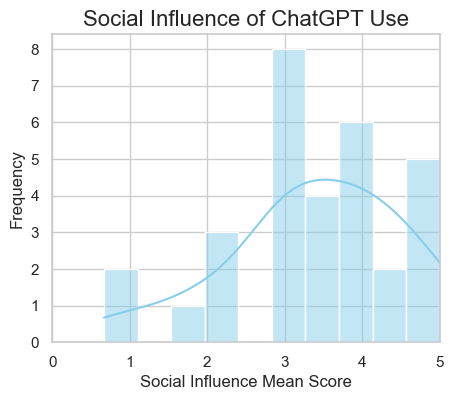

In [40]:
plot_numerical('SOI_mean', 'Social Influence of ChatGPT Use', 'Social Influence Mean Score')

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


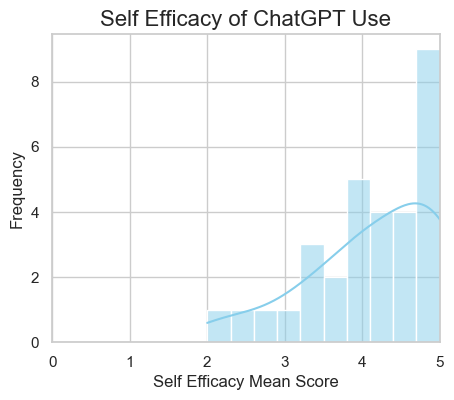

In [41]:
plot_numerical('SEF_mean', 'Self Efficacy of ChatGPT Use', 'Self Efficacy Mean Score')

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


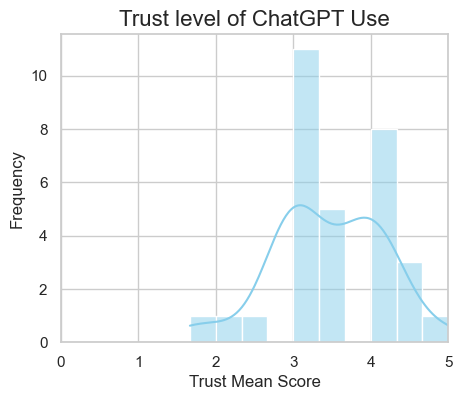

In [42]:
plot_numerical('TRU_mean', 'Trust level of ChatGPT Use', 'Trust Mean Score')

In [43]:
df_LexicalAnalysis=pd.read_csv('LexicalAnalysis.csv',index_col=0)

In [44]:
df_LexicalAnalysis.head()

,CaseNo,Prompt_count,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index
0,1,11,130,74,67.76,54.12,-0.783810
1,3,9,108,65,76.11,44.44,-1.190867
2,6,10,270,135,87.11,59.19,0.180197
3,7,6,117,83,83.25,62.88,1.146846
4,8,7,74,52,96.89,66.84,-0.065436


In [45]:
merged_df1=merged_df.merge(df_LexicalAnalysis, how='inner', on='CaseNo')

In [46]:
df_GrammerCheck=pd.read_csv('GrammerCheck.csv',index_col=0)
merged_df2=merged_df1.merge(df_GrammerCheck, how='inner', on='Participant')

In [47]:
merged_df2.columns

Index(['CaseNo', 'age_group', 'gender', 'highest_education',
       'employment_status', 'computing_proficiency', 'prior_ai_experience',
       'ai_usage_capacity', 'ITU', 'SAT', 'liked_most', 'challenges_faced',
       'suggestions', 'Participant', 'ParticipantNo', 'PEX_mean', 'EEX_mean',
       'SOI_mean', 'SEF_mean', 'TRU_mean', 'EEX', 'SOI', 'TRU', 'SEF', 'PEX',
       'Prompt_count', 'Word_Count', 'unique_word_count', 'Prompt_readability',
       'Response_readability', 'lexical_diversity_index', 'Error_Count',
       'Average_Words_per_Prompt', 'Errors_per_ Word'],
      dtype='object')

In [48]:
merged_df2['UX']=(merged_df2['SAT']+merged_df2['ITU'])/2
merged_df2.head()

,CaseNo,age_group,gender,highest_education,employment_status,computing_proficiency,prior_ai_experience,ai_usage_capacity,ITU,SAT,...,Prompt_count,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index,Error_Count,Average_Words_per_Prompt,Errors_per_ Word,UX
0,1,35-44,Male,Postgraduate Degree,Employed part-time,Expert,Yes,"For work or professional tasks, For academic o...",4,4,...,11,130,74,67.76,54.12,-0.783810,1,11.818182,0.007692,4.0
1,3,35-44,Male,Postgraduate Degree,Student,Advanced,Yes,For personal interest or tasks,3,3,...,9,108,65,76.11,44.44,-1.190867,1,12.000000,0.009259,3.0
2,6,35-44,Male,Postgraduate Degree,Employed full-time,Advanced,Yes,For academic or research purposes,4,5,...,10,270,135,87.11,59.19,0.180197,18,27.000000,0.066667,4.5
3,7,45-54,Female,College Graduate,Employed full-time,Novice,Yes,For work or professional tasks,4,4,...,6,117,83,83.25,62.88,1.146846,12,19.500000,0.102564,4.0
4,8,18-24,Male,College Graduate,Employed full-time,Advanced,Yes,"For work or professional tasks, For academic o...",5,4,...,7,74,52,96.89,66.84,-0.065436,1,10.571429,0.013514,4.5


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


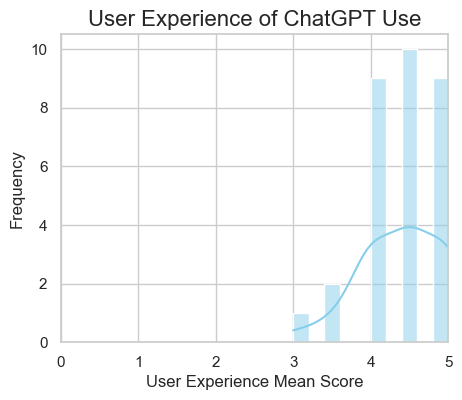

In [49]:
def plot_numerical(column, title, xlabel):
    plt.figure(figsize=(5, 4))
    sns.histplot(merged_df2[column], kde=True, bins=10, color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency')
    plt.xlim(0, 5)  # Set x-axis limits from 0 to 5
    plt.show()

plot_numerical('UX', 'User Experience of ChatGPT Use', 'User Experience Mean Score')

In [50]:
reduced_df=merged_df2.drop(['PEX_mean', 'EEX_mean', 'SOI_mean', 'SEF_mean','TRU_mean',
       'ai_usage_capacity', 'liked_most', 'challenges_faced', 'suggestions', 'CaseNo', 'SAT', 'ITU'], axis=1)

In [51]:
reduced_df=reduced_df[['Participant', 'ParticipantNo', 'age_group', 'gender', 'highest_education', 'employment_status',
       'computing_proficiency', 'prior_ai_experience', 'PEX', 'EEX', 'SOI', 'SEF',
       'TRU', 'Prompt_count', 'Average_Words_per_Prompt', 'Word_Count', 'unique_word_count', 'Prompt_readability',
       'Response_readability', 'lexical_diversity_index', 'Error_Count', 'Errors_per_ Word', 'UX']]

In [52]:
# Columns to exclude from z-score calculation
exclude_cols = ['PEX', 'EEX', 'SOI', 'SEF','TRU','ParticipantNo','lexical_diversity_index']

df_scaled=reduced_df.copy()
# Select numeric columns and exclude specified columns
numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# Calculate z-scores for the selected numeric columns
df_scaled[numeric_cols] = df_scaled[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

df_scaled.describe()

,ParticipantNo,PEX,EEX,SOI,SEF,TRU,Prompt_count,Average_Words_per_Prompt,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index,Error_Count,Errors_per_ Word,UX
count,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,16.000000,-9.633871e-16,-1.642951e-16,2.435328e-16,4.870656e-16,-1.038596e-16,-1.146037e-16,-1.217664e-16,7.162729e-18,1.289291e-16,-1.024270e-15,3.008346e-16,2.161354e-15,2.238353e-18,1.002782e-16,6.446456e-16
std,9.092121,1.031266e+00,1.003746e+00,1.028635e+00,9.360889e-01,9.651968e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.428549e-01,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-2.635332e+00,-2.255179e+00,-2.561626e+00,-2.341342e+00,-2.357885e+00,-9.219562e-01,-1.666171e+00,-1.195937e+00,-1.314017e+00,-2.273537e+00,-2.541709e+00,-1.937425e+00,-9.463837e-01,-1.331830e+00,-2.628442e+00
25%,8.500000,-7.080732e-01,-5.290416e-01,-6.747630e-01,-2.741755e-01,-6.117907e-01,-5.646982e-01,-7.470805e-01,-6.566976e-01,-7.335070e-01,-5.523733e-01,-6.308452e-01,-7.218316e-01,-6.927420e-01,-9.560374e-01,-7.335186e-01
50%,16.000000,3.444786e-01,1.827715e-01,2.176774e-01,3.062208e-01,-3.464023e-02,-2.074401e-01,-3.039853e-01,-2.989843e-01,-3.012120e-01,2.134808e-02,-1.421858e-01,1.801965e-01,-3.545530e-01,-5.584445e-02,2.139429e-01
75%,23.500000,7.845933e-01,4.564240e-01,8.339435e-01,7.133478e-01,6.617542e-01,3.284469e-01,5.755553e-01,4.911884e-01,4.892703e-01,7.172462e-01,7.440117e-01,6.875421e-01,4.486459e-01,7.146670e-01,1.161404e+00
max,31.000000,1.348685e+00,1.637384e+00,1.599247e+00,9.840826e-01,2.066434e+00,4.436914e+00,2.400786e+00,3.107301e+00,2.440773e+00,1.960903e+00,1.823172e+00,1.415216e+00,3.788262e+00,2.678411e+00,1.161404e+00


In [53]:
# Define the columns to convert into categorical variables based on their z-scores
categorical_cols = ['PEX', 'EEX', 'SOI', 'SEF', 'TRU',
                    'Prompt_count', 'Word_Count', 'unique_word_count', 'Prompt_readability',
                    'Response_readability', 'lexical_diversity_index', 'UX', 'Error_Count',
                    'Average_Words_per_Prompt', 'Errors_per_ Word']

df_categorical=df_scaled.copy()
# Convert values into 'high' if positive, 'low' if negative
df_categorical[categorical_cols] = df_categorical[categorical_cols].map(lambda x: 'High' if x >= 0 else 'Low')

df_categorical.head()

,Participant,ParticipantNo,age_group,gender,highest_education,employment_status,computing_proficiency,prior_ai_experience,PEX,EEX,...,Prompt_count,Average_Words_per_Prompt,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index,Error_Count,Errors_per_ Word,UX
0,P1,1,35-44,Male,Postgraduate Degree,Employed part-time,Expert,Yes,High,High,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
1,P2,2,35-44,Male,Postgraduate Degree,Student,Advanced,Yes,Low,High,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
2,P3,3,35-44,Male,Postgraduate Degree,Employed full-time,Advanced,Yes,High,Low,...,Low,High,High,High,High,High,High,High,High,High
3,P4,4,45-54,Female,College Graduate,Employed full-time,Novice,Yes,Low,Low,...,Low,High,Low,Low,High,High,High,High,High,Low
4,P5,5,18-24,Male,College Graduate,Employed full-time,Advanced,Yes,High,High,...,Low,Low,Low,Low,High,High,Low,Low,Low,High


In [54]:
t=df[df_categorical['TRU']=='High']

In [55]:
len(t)

15

In [56]:
df_categorical.to_clipboard()

In [57]:
df_categorical.to_csv('df_categorical.csv')

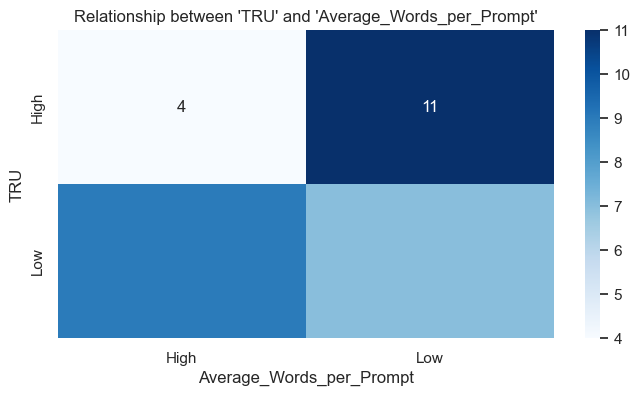

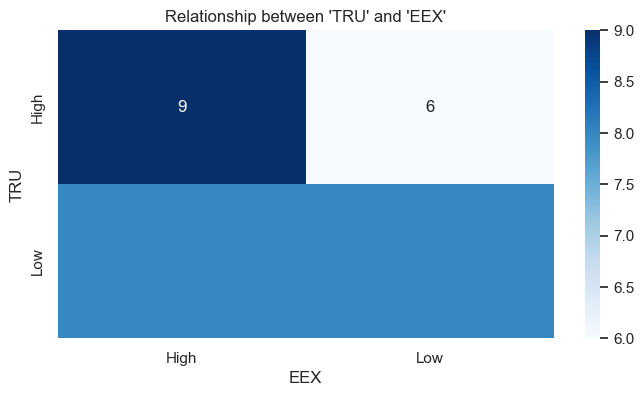

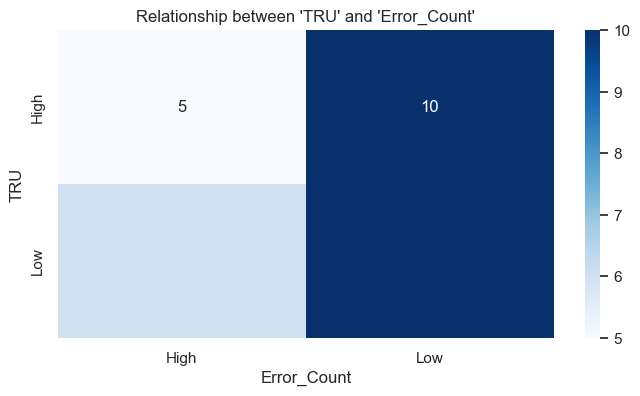

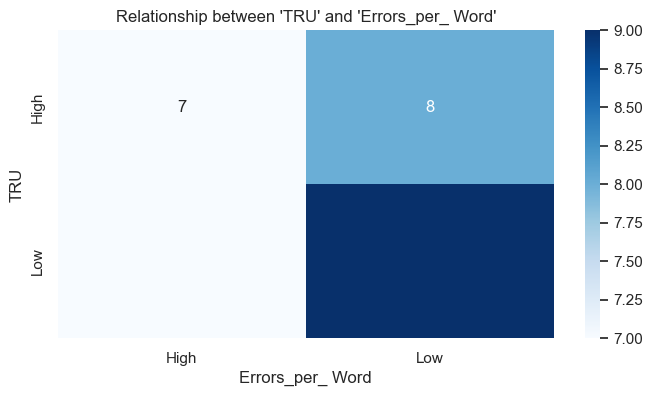

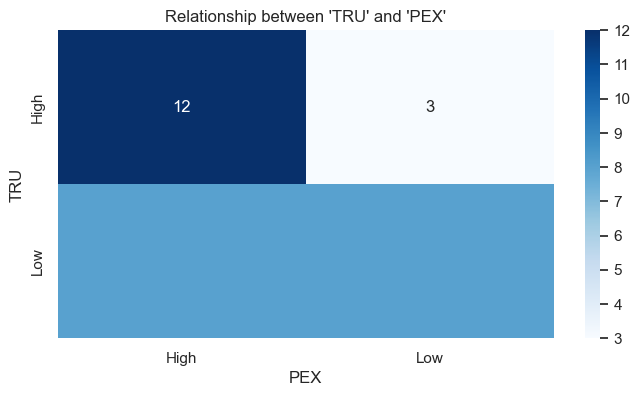

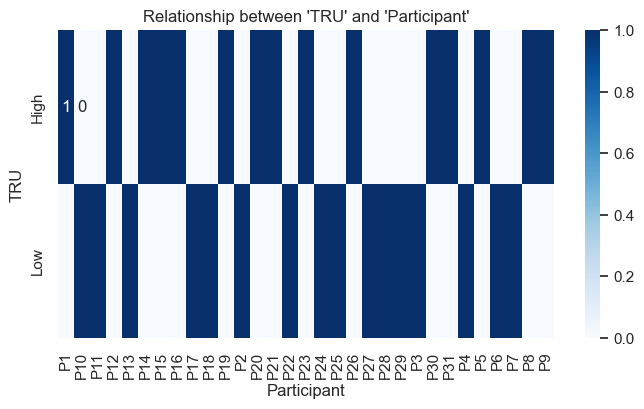

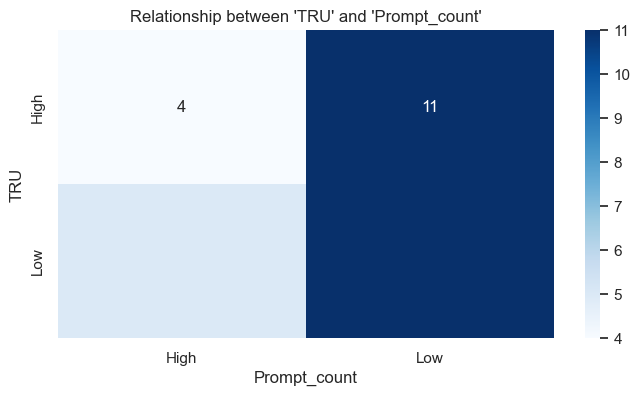

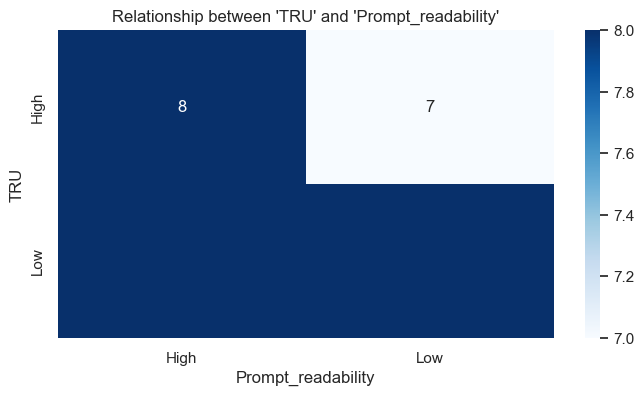

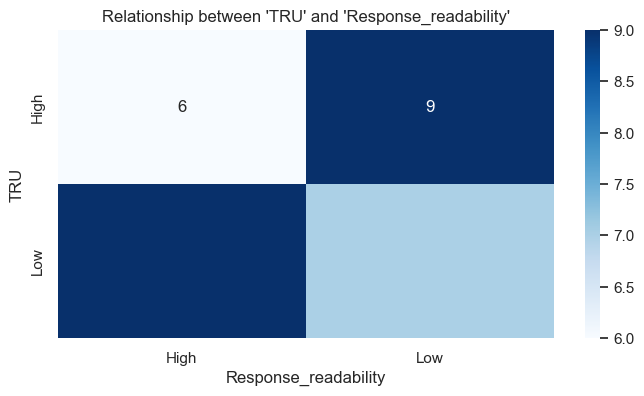

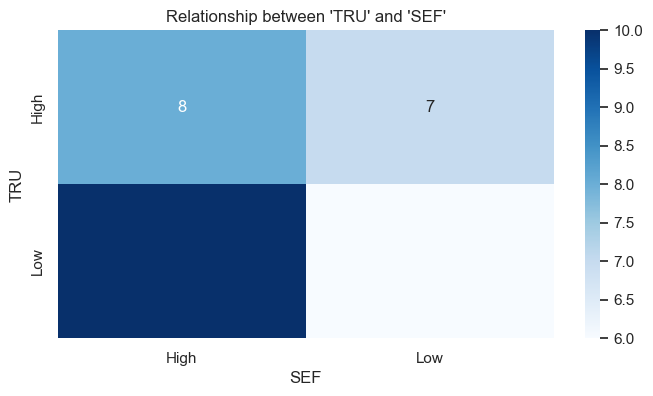

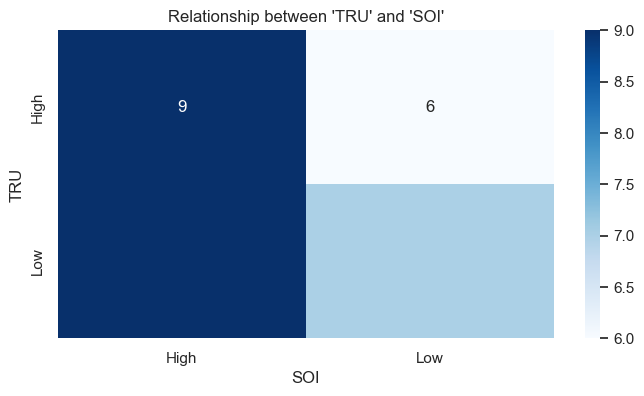

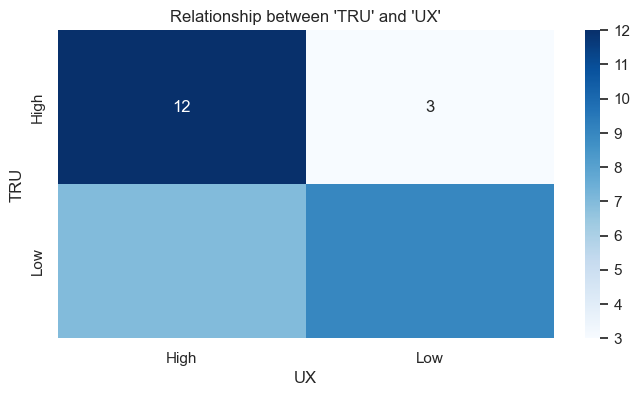

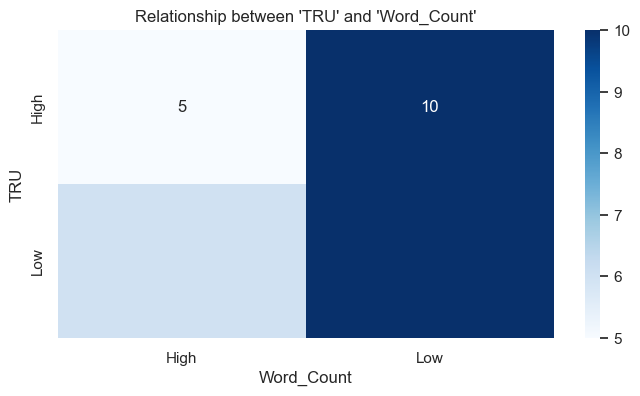

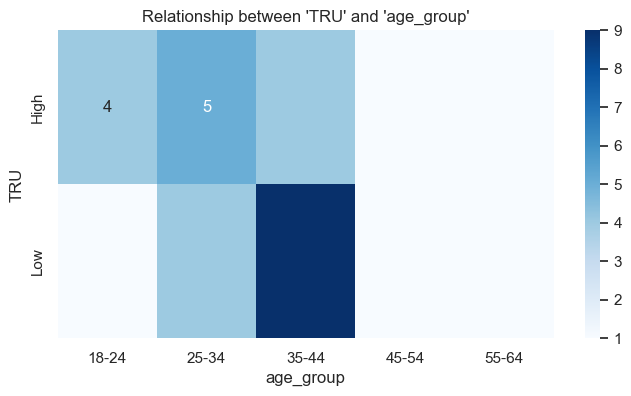

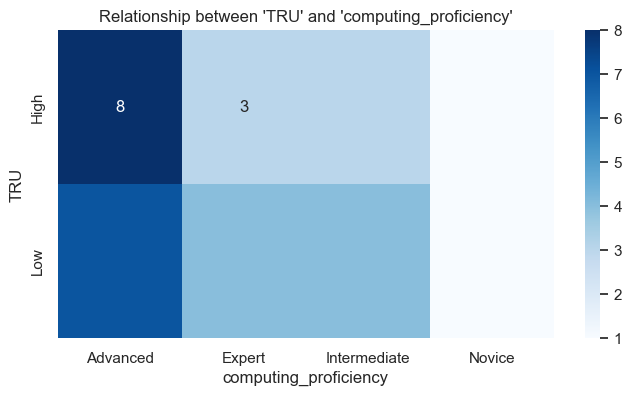

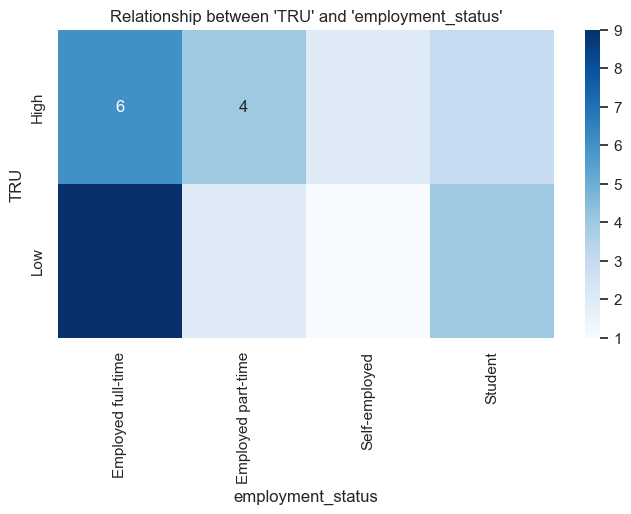

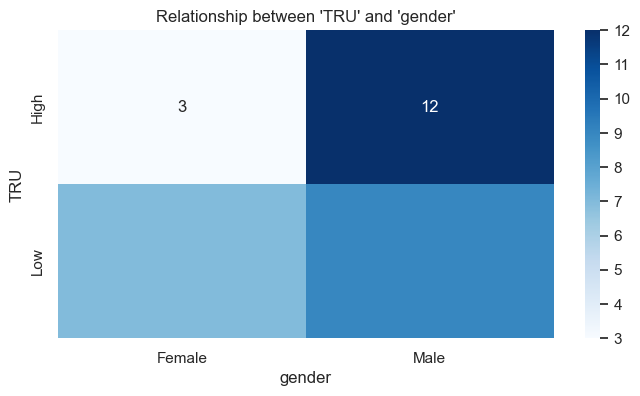

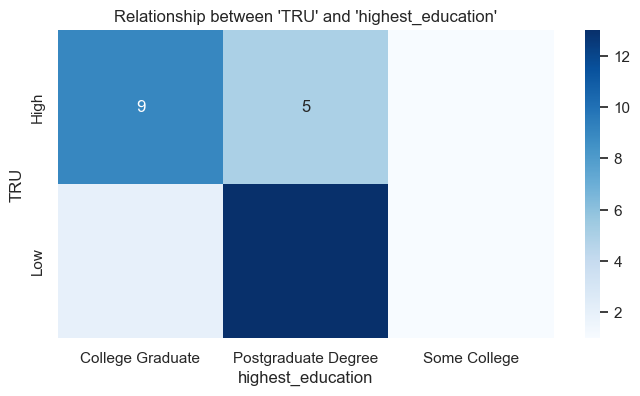

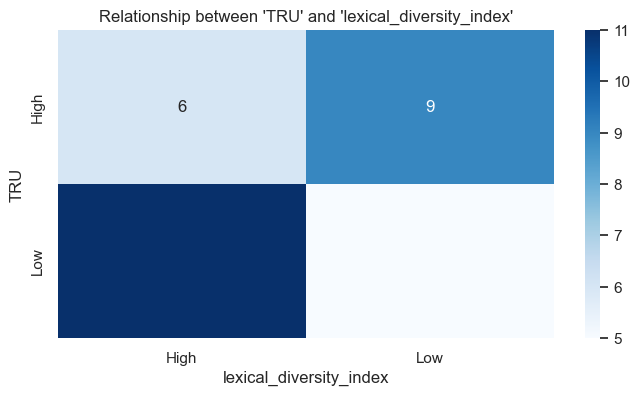

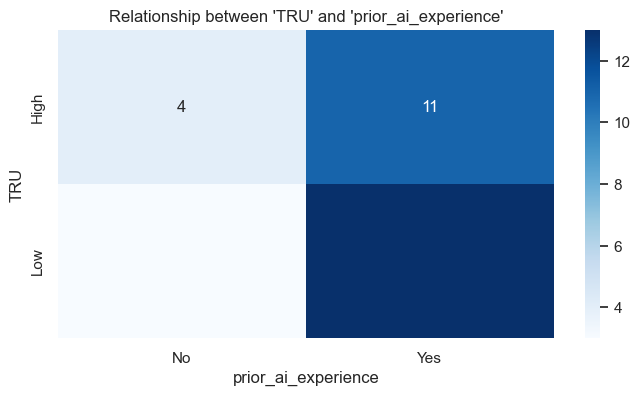

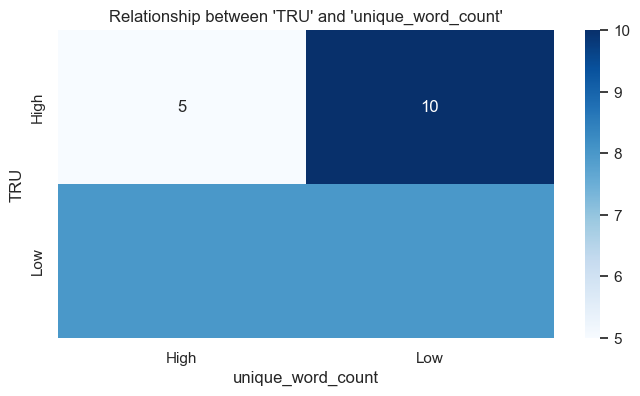

{'Average_Words_per_Prompt': Average_Words_per_Prompt  High  Low
 TRU                                
 High                         4   11
 Low                          9    7,
 'EEX': EEX   High  Low
 TRU            
 High     9    6
 Low      8    8,
 'Error_Count': Error_Count  High  Low
 TRU                   
 High            5   10
 Low             6   10,
 'Errors_per_ Word': Errors_per_ Word  High  Low
 TRU                        
 High                 7    8
 Low                  7    9,
 'PEX': PEX   High  Low
 TRU            
 High    12    3
 Low      8    8,
 'Participant': Participant  P1  P10  P11  P12  P13  P14  P15  P16  P17  P18  ...  P29  P3  \
 TRU                                                           ...            
 High          1    0    0    1    0    1    1    1    0    0  ...    0   0   
 Low           0    1    1    0    1    0    0    0    1    1  ...    1   1   
 
 Participant  P30  P31  P4  P5  P6  P7  P8  P9  
 TRU                                    

In [58]:
# Analyzing the relationship between 'TRU' and other variables
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation to see relationships between 'TRU' and other categorical variables
cross_tab_results = {}

# Select relevant categorical columns
categorical_columns = df_categorical.columns.difference(['Unnamed: 0', 'ParticipantNo'])

# Generate cross-tabulations and plots to identify potential relationships with 'TRU'
for column in categorical_columns:
    if column != 'TRU':
        cross_tab = pd.crosstab(df_categorical['TRU'], df_categorical[column])
        cross_tab_results[column] = cross_tab

        # Plotting heatmaps for better visualization
        plt.figure(figsize=(8, 4))
        sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
        plt.title(f"Relationship between 'TRU' and '{column}'")
        plt.xlabel(column)
        plt.ylabel('TRU')
        plt.show()

# Display the cross-tabulations for review
cross_tab_results


Based on the analysis and visualizations, here are some observations about the relationship between 'TRU_mean' and other variables:

EEX_mean: Higher values of 'TRU_mean' are more associated with higher 'EEX_mean', while low 'TRU_mean' is fairly evenly distributed between high and low 'EEX_mean'.

ITU: 'TRU_mean' being high is associated more with higher 'ITU', while low 'TRU_mean' is more common with lower 'ITU'.

PEX_mean: High 'TRU_mean' is slightly more common with high 'PEX_mean' compared to low 'PEX_mean'.

Prompt Readability and Response Readability: No strong patterns between 'TRU_mean' and readability variables, as both high and low readability appear evenly distributed.

SEF_mean and SOI_mean: 'TRU_mean' is distributed quite evenly across high and low values of these variables, showing no significant relationship.

SAT: High 'TRU_mean' is slightly more often associated with low 'SAT', while low 'TRU_mean' is more often associated with high 'SAT'.

Word Count and Unique Word Count: Low 'TRU_mean' appears more balanced across both high and low word counts, whereas high 'TRU_mean' leans more towards low word count.

Age Group: There is a diverse distribution of 'TRU_mean' across age groups, with no clear age group dominating either high or low 'TRU_mean'.

Computing Proficiency: High 'TRU_mean' is often associated with higher computing proficiency levels like 'Advanced' and 'Expert', while low 'TRU_mean' appears across a broader range of proficiency levels.

Employment Status: High 'TRU_mean' is relatively evenly spread among students, full-time, and part-time employment, whereas low 'TRU_mean' is more associated with full-time employment.

Gender: High 'TRU_mean' appears more frequently for males, while low 'TRU_mean' is distributed more evenly across genders.

Highest Education: High 'TRU_mean' seems more associated with higher educational levels like 'College Graduate' and 'Postgraduate Degree'.

Prior AI Experience: 'TRU_mean' being high is more often associated with having prior AI experience.

In summary, there seem to be some noticeable patterns where a high 'TRU_mean' correlates with higher computing proficiency, higher education, and prior AI experience, while low 'TRU_mean' appears to correlate more with lower 'ITU' and 'SAT'

{'Average_Words_per_Prompt': Average_Words_per_Prompt  High  Low
UX                                 
High                         8   11
Low                          5    7, 'EEX': EEX   High  Low
UX             
High    12    7
Low      5    7, 'Error_Count': Error_Count  High  Low
UX                    
High            9   10
Low             2   10, 'Errors_per_ Word': Errors_per_ Word  High  Low
UX                         
High                 8   11
Low                  6    6, 'PEX': PEX   High  Low
UX             
High    16    3
Low      4    8, 'Participant': Participant  P1  P10  P11  P12  P13  P14  P15  P16  P17  P18  ...  P29  P3  \
UX                                                            ...            
High          0    0    1    1    0    1    1    1    0    1  ...    1   1   
Low           1    1    0    0    1    0    0    0    1    0  ...    0   0   

Participant  P30  P31  P4  P5  P6  P7  P8  P9  
UX                                             
High           1 

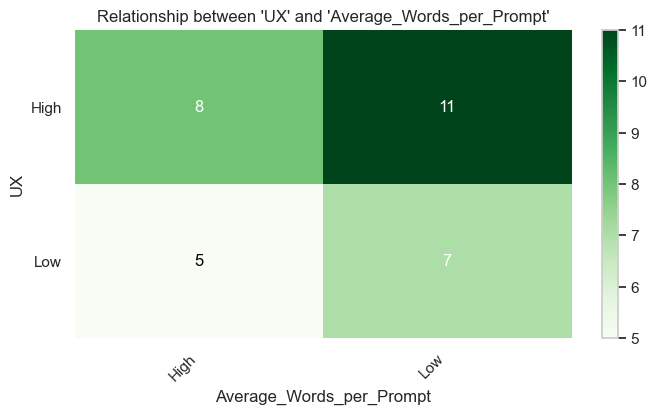

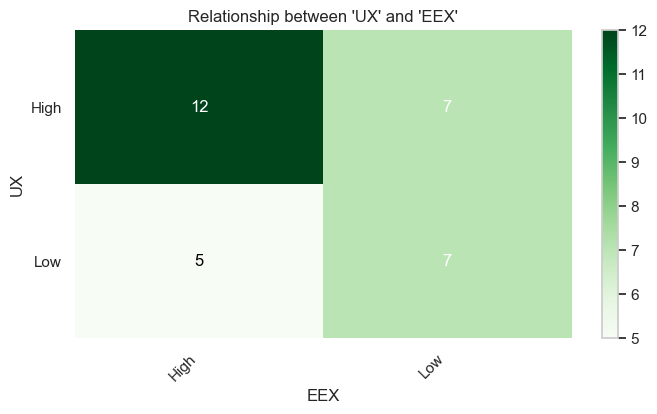

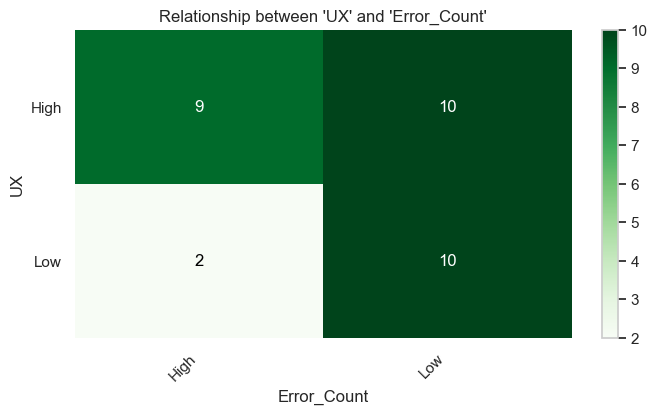

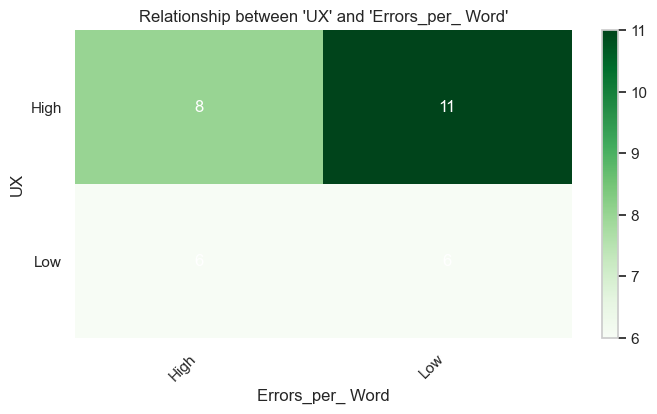

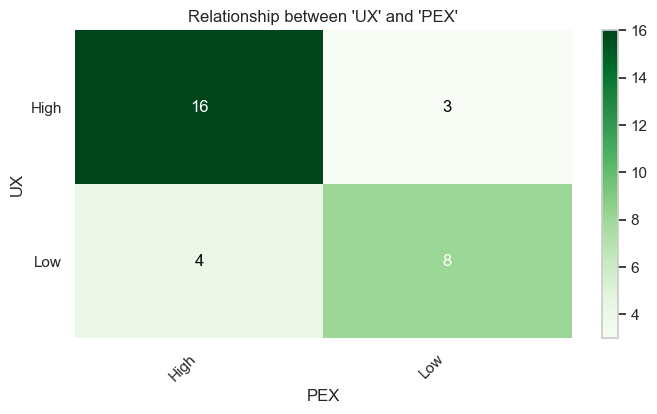

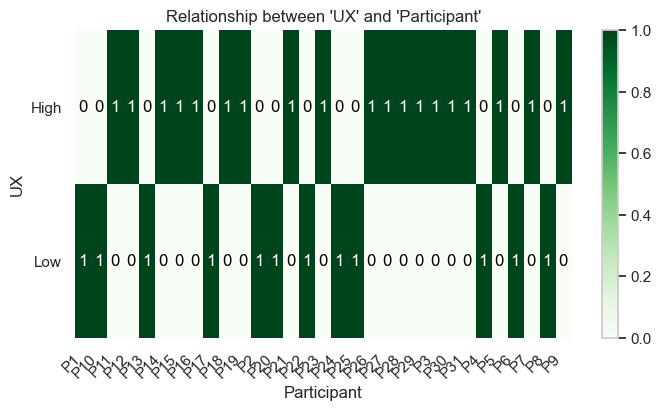

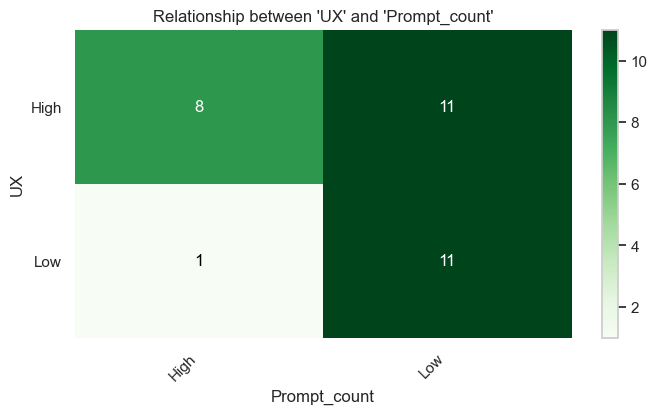

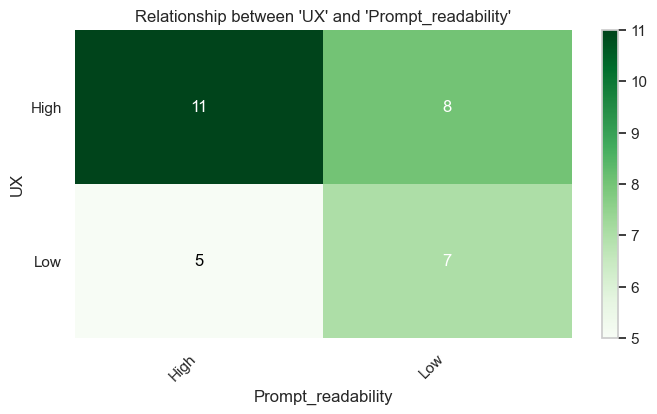

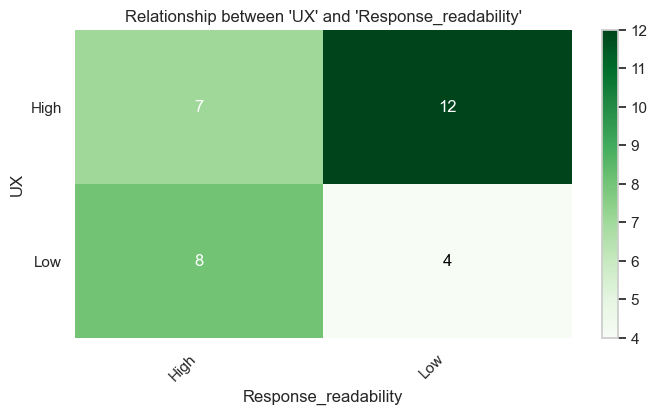

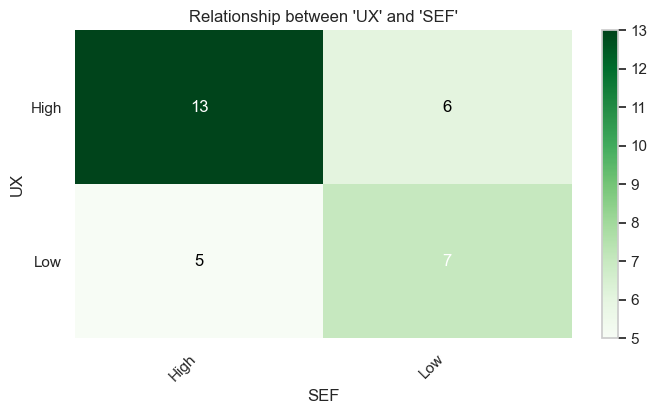

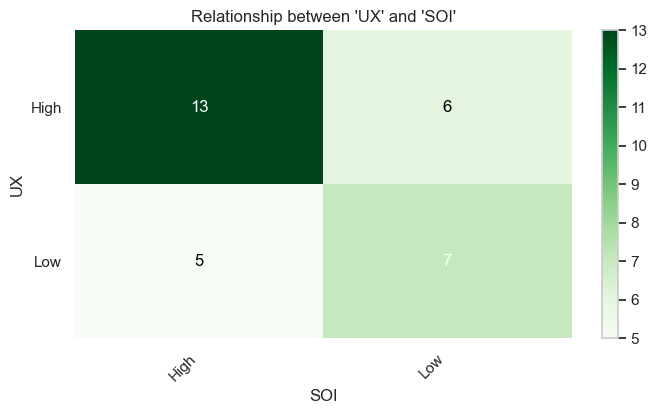

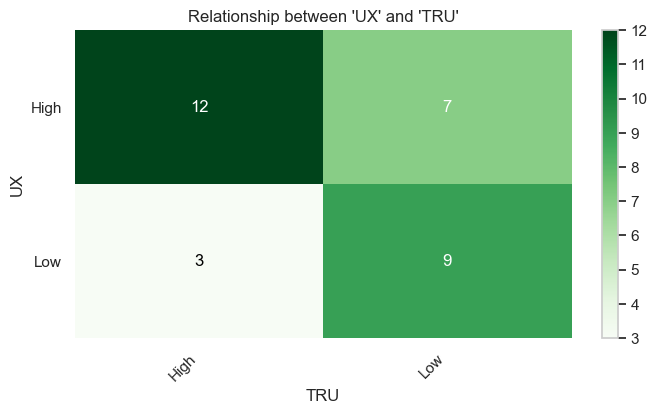

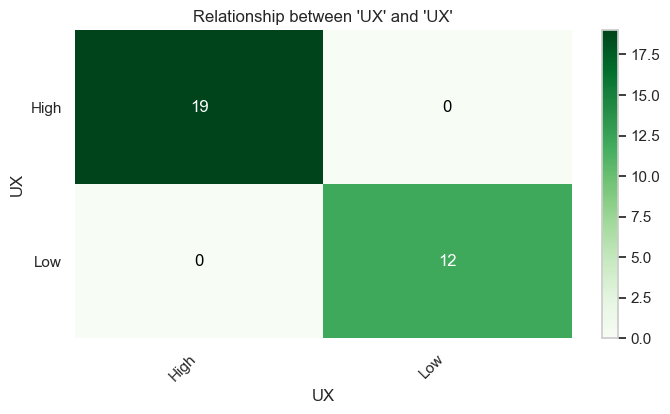

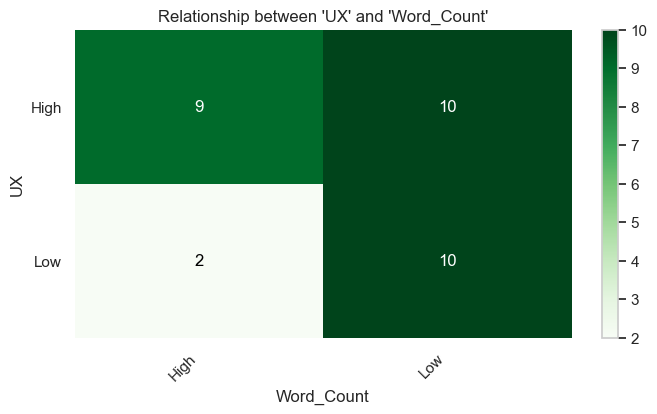

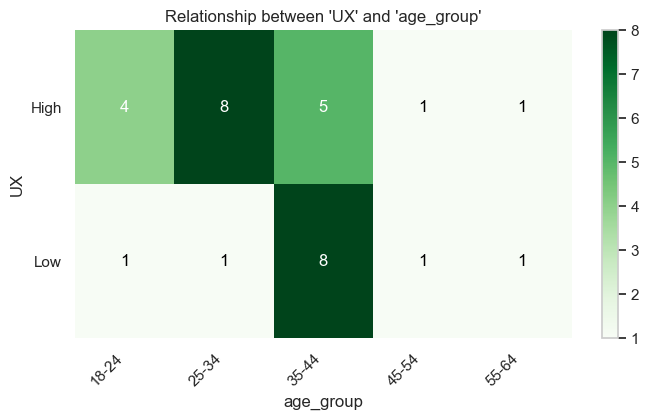

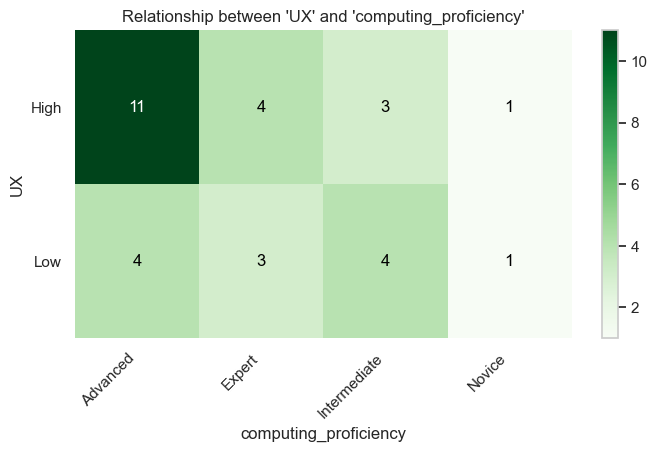

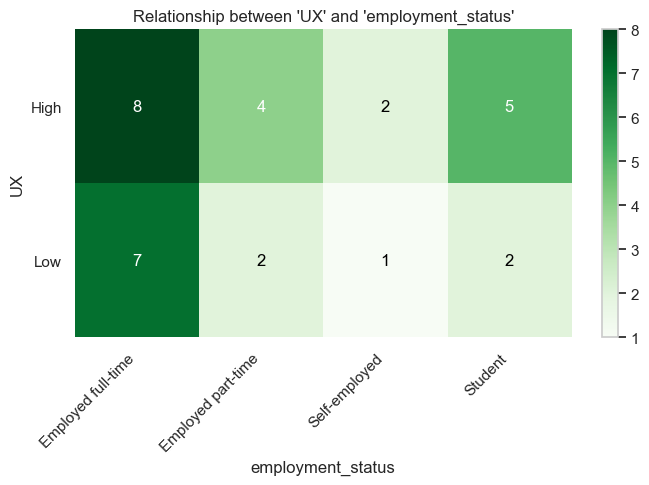

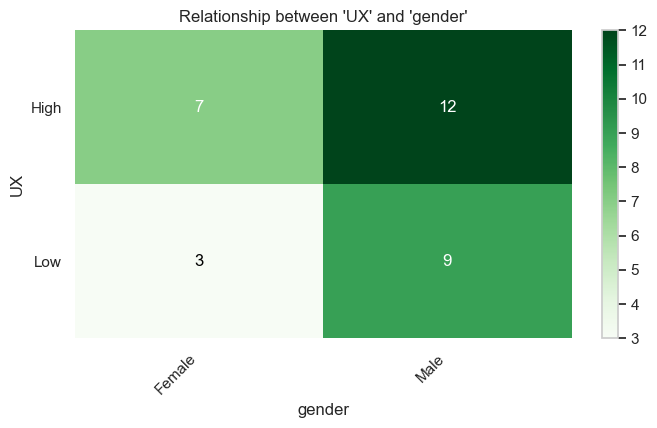

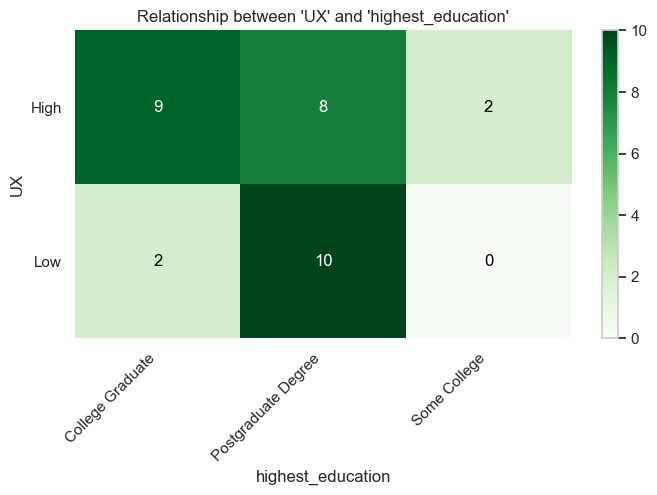

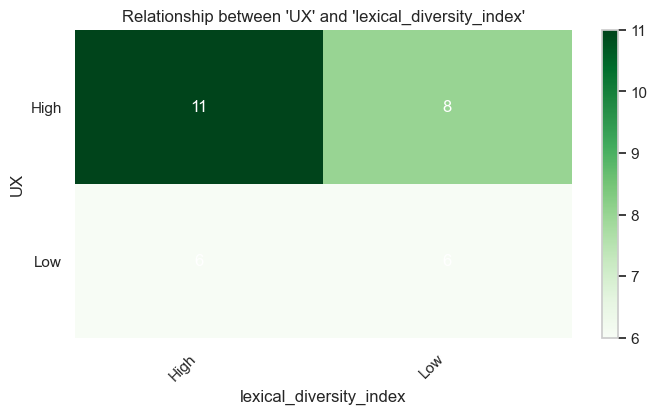

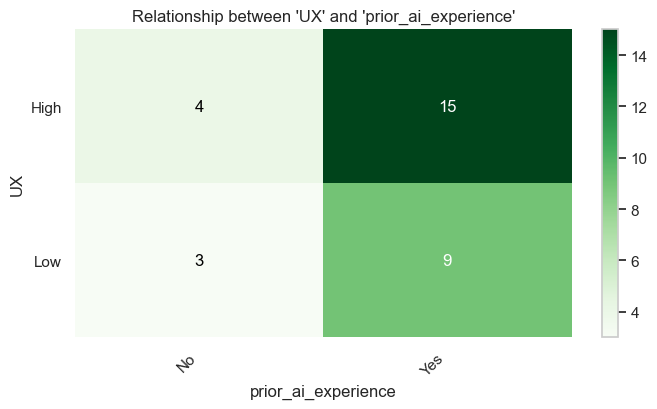

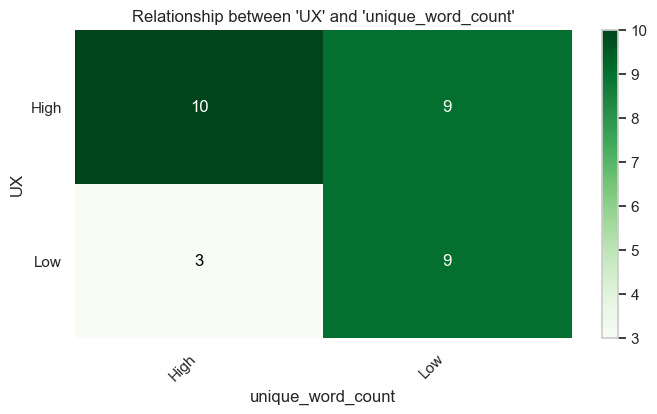

In [59]:
# Analyzing the relationship between 'SAT' and other variables

# Cross-tabulation results for 'SAT'
cross_tab_results_sat = {}

# Generate cross-tabulations and plots to identify potential relationships with 'SAT'
for column in categorical_columns:
    if column != 'SAT':
        cross_tab = pd.crosstab(df_categorical['UX'], df_categorical[column])
        cross_tab_results_sat[column] = cross_tab

        # Plotting heatmaps for better visualization
        #plt.figure(figsize=(8, 4))
        #sns.heatmap(cross_tab, annot=True, cmap='Greens', fmt='g')
        #plt.title(f"Relationship between 'SAT' and '{column}'")
        #plt.xlabel(column)
        #plt.ylabel('SAT')
        #plt.show()

# Display the cross-tabulations for review
print(cross_tab_results_sat)

import matplotlib.pyplot as plt

# Assuming cross_tab_results_sat contains the crosstab data from your loop above

# Analyzing the relationship between 'SAT' and other variables using Matplotlib
for column, cross_tab in cross_tab_results_sat.items():
    plt.figure(figsize=(8, 4))
    plt.imshow(cross_tab, cmap='Greens', aspect='auto')

    # Adding annotations manually
    for i in range(cross_tab.shape[0]):
        for j in range(cross_tab.shape[1]):
            plt.text(j, i, cross_tab.iloc[i, j], ha='center', va='center', 
                     color='black' if cross_tab.iloc[i, j] < cross_tab.values.max()/2 else 'white')

    # Setting axis labels and title
    plt.xticks(range(cross_tab.shape[1]), cross_tab.columns, rotation=45, ha="right")
    plt.yticks(range(cross_tab.shape[0]), cross_tab.index)
    plt.xlabel(column)
    plt.ylabel('UX')
    plt.title(f"Relationship between 'UX' and '{column}'")
    
    plt.gca().spines[:].set_visible(False)  # Hides all spines (borders)
    plt.grid(False)  # Turns off the grid if any exists
    # Display color bar
    plt.colorbar()
    plt.show()



Based on the analysis and visualizations, here are some observations about the relationship between 'SAT' and other variables:

EEX_mean: High 'SAT' values are associated more with high 'EEX_mean', whereas low 'SAT' values are evenly distributed between high and low 'EEX_mean'.

ITU: 'SAT' being high is more often associated with high 'ITU', whereas low 'SAT' correlates more with low 'ITU'.

PEX_mean: High 'SAT' is more common when 'PEX_mean' is high, while low 'SAT' is distributed across both high and low 'PEX_mean'.

Prompt Readability: Low 'SAT' is associated more often with low prompt readability, while high 'SAT' is balanced between high and low readability.

Response Readability: High 'SAT' is more common with low response readability, whereas low 'SAT' is more evenly distributed.

SEF_mean: High 'SAT' is associated mostly with high 'SEF_mean', whereas low 'SAT' is associated more with low 'SEF_mean'.

SOI_mean: High 'SAT' is more common with low 'SOI_mean', whereas low 'SAT' is more balanced across high and low values.

TRU_mean: High 'SAT' is fairly evenly distributed across high and low 'TRU_mean', while low 'SAT' appears more often with low 'TRU_mean'.

Word Count and Unique Word Count: Low 'SAT' appears more often with lower word count and unique word count, while high 'SAT' shows a more even distribution.

Age Group: High 'SAT' is associated more with younger age groups, such as '25-34', whereas low 'SAT' appears more often in '35-44'.

Computing Proficiency: High 'SAT' is associated with higher proficiency levels, particularly 'Advanced' and 'Expert', whereas low 'SAT' is more broadly distributed across different levels.

Employment Status: High 'SAT' is common among students and part-time employees, whereas low 'SAT' is more common among full-time employees.

Gender: High 'SAT' is fairly evenly distributed between genders, while low 'SAT' appears more frequently among males.

Highest Education: High 'SAT' tends to be associated with higher education levels like 'Postgraduate Degree', whereas low 'SAT' is more common among 'College Graduates'.

Prior AI Experience: High 'SAT' is more common among those with prior AI experience.

In summary, high 'SAT' seems to correlate with factors like higher computing proficiency, higher education levels, and prior AI experience, while low 'SAT' is often associated with lower proficiency, lower education levels, and less exposure to AI

In [60]:
df_encoded=df_scaled.copy()

In [61]:
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
columns_to_encode = ['age_group', 'highest_education', 'employment_status', 'computing_proficiency', 'prior_ai_experience']

# Custom order for each column (reordered from lower to higher value)
age_group_order = ['18-24', '25-34', '35-44', '45-54', '55-64']
highest_education_order = ['Some College', 'College Graduate', 'Postgraduate Degree']
employment_status_order = ['Student', 'Employed part-time', 'Employed full-time', 'Self-employed']
computing_proficiency_order = ['Novice', 'Intermediate', 'Advanced', 'Expert']
prior_ai_experience_order = ['No', 'Yes']

# Define the categories for each column to be encoded
categories = [
    age_group_order,                # Custom order for age_group
    highest_education_order,        # Custom order for highest_education
    employment_status_order,        # Custom order for employment_status
    computing_proficiency_order,    # Custom order for computing_proficiency
    prior_ai_experience_order       # Custom order for prior_ai_experience
]

# Handle missing values if any (fill with a placeholder or drop rows)
df_encoded[columns_to_encode] = df_encoded[columns_to_encode].fillna('Unknown')

# Instantiate the OrdinalEncoder with defined categories
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the specified columns
try:
    df_encoded[columns_to_encode] = ordinal_encoder.fit_transform(df_encoded[columns_to_encode])
    # Display the updated dataframe to verify encoding
    print("Successfully encoded columns:")
    print(df_encoded[columns_to_encode].head())
except Exception as e:
    print("An error occurred during encoding:")
    print(e)


Successfully encoded columns:
   age_group  highest_education  employment_status  computing_proficiency  \
0        2.0                2.0                1.0                    3.0   
1        2.0                2.0                0.0                    2.0   
2        2.0                2.0                2.0                    2.0   
3        3.0                1.0                2.0                    0.0   
4        0.0                1.0                2.0                    2.0   

   prior_ai_experience  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  


In [62]:

# Selecting the specified columns to calculate correlations
correlation_cols = [
    'age_group', 'highest_education', 'employment_status', 'computing_proficiency', 'prior_ai_experience',
    'PEX', 'EEX', 'SOI', 'SEF', 'TRU',
    'Word_Count', 'unique_word_count', 'Prompt_readability',
    'Response_readability', 'lexical_diversity_index', 'Error_Count',
    'Average_Words_per_Prompt', 'Errors_per_ Word', 'UX'
]

# Calculating correlations for the selected columns in 'df_scaled'

correlation_matrix = df_encoded[correlation_cols].corr()


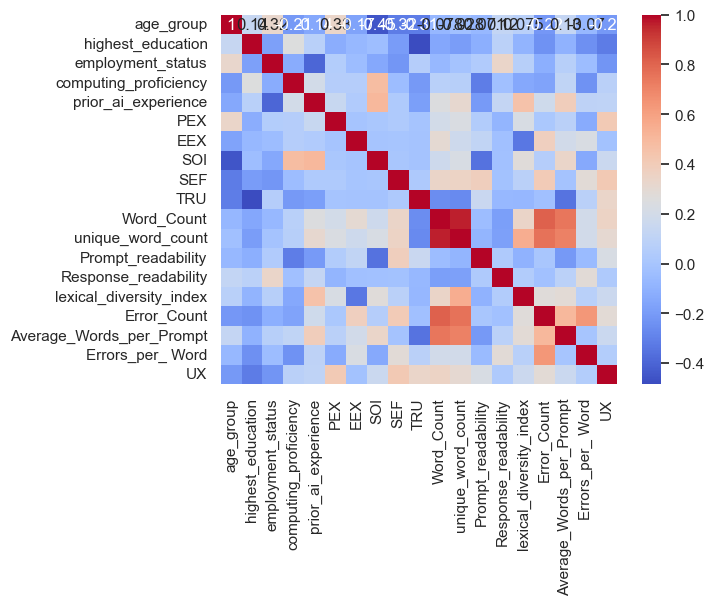

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


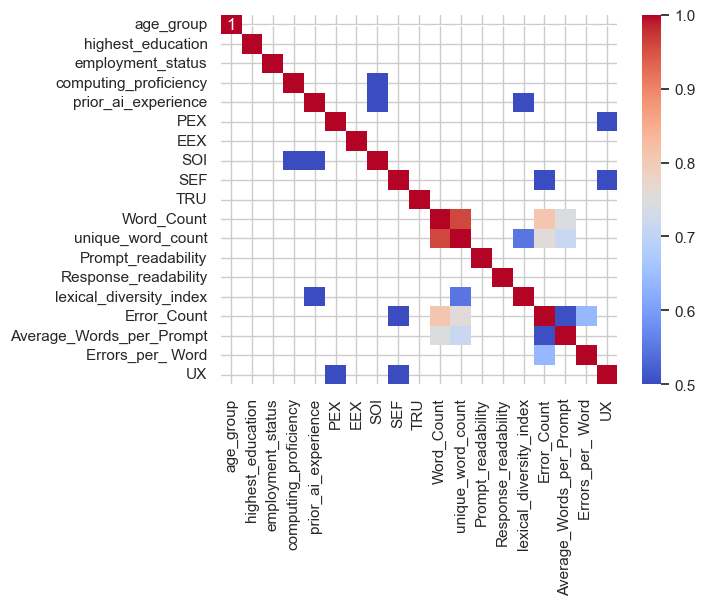

In [64]:

# Create a mask for correlations less than or equal to 0.5
mask = correlation_matrix <= 0.4

# Plot heatmap with the mask applied
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=0.5, vmax=1)
plt.show()


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


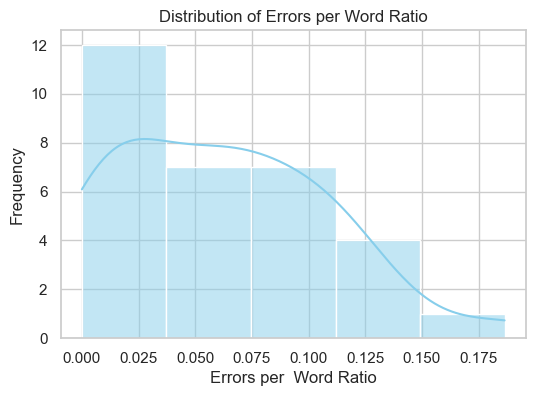

In [65]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plot histogram and KDE for the distribution of Word_Count
plt.figure(figsize=(6, 4))

# Histogram with KDE
sns.histplot(reduced_df['Errors_per_ Word'], kde=True, bins=5, color='skyblue')

# Set labels and title
plt.xlabel('Errors per  Word Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Errors per Word Ratio')
plt.show()


# Open Ended Questions

In [66]:
df_open_ended=df[['Participant','liked_most', 'challenges_faced','suggestions']]
df_open_ended.to_csv('df_open_ended.csv')

# Participant Categorization

In [67]:
df_encoded.describe()

,ParticipantNo,age_group,highest_education,employment_status,computing_proficiency,prior_ai_experience,PEX,EEX,SOI,SEF,...,Prompt_count,Average_Words_per_Prompt,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index,Error_Count,Errors_per_ Word,UX
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,...,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,16.000000,1.580645,1.516129,1.451613,1.870968,0.774194,-9.633871e-16,-1.642951e-16,2.435328e-16,4.870656e-16,...,-1.146037e-16,-1.217664e-16,7.162729e-18,1.289291e-16,-1.024270e-15,3.008346e-16,2.161354e-15,2.238353e-18,1.002782e-16,6.446456e-16
std,9.092121,1.057487,0.625618,0.960511,0.846244,0.425024,1.031266e+00,1.003746e+00,1.028635e+00,9.360889e-01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.428549e-01,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.635332e+00,-2.255179e+00,-2.561626e+00,-2.341342e+00,...,-9.219562e-01,-1.666171e+00,-1.195937e+00,-1.314017e+00,-2.273537e+00,-2.541709e+00,-1.937425e+00,-9.463837e-01,-1.331830e+00,-2.628442e+00
25%,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,-7.080732e-01,-5.290416e-01,-6.747630e-01,-2.741755e-01,...,-5.646982e-01,-7.470805e-01,-6.566976e-01,-7.335070e-01,-5.523733e-01,-6.308452e-01,-7.218316e-01,-6.927420e-01,-9.560374e-01,-7.335186e-01
50%,16.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.444786e-01,1.827715e-01,2.176774e-01,3.062208e-01,...,-2.074401e-01,-3.039853e-01,-2.989843e-01,-3.012120e-01,2.134808e-02,-1.421858e-01,1.801965e-01,-3.545530e-01,-5.584445e-02,2.139429e-01
75%,23.500000,2.000000,2.000000,2.000000,2.000000,1.000000,7.845933e-01,4.564240e-01,8.339435e-01,7.133478e-01,...,3.284469e-01,5.755553e-01,4.911884e-01,4.892703e-01,7.172462e-01,7.440117e-01,6.875421e-01,4.486459e-01,7.146670e-01,1.161404e+00
max,31.000000,4.000000,2.000000,3.000000,3.000000,1.000000,1.348685e+00,1.637384e+00,1.599247e+00,9.840826e-01,...,4.436914e+00,2.400786e+00,3.107301e+00,2.440773e+00,1.960903e+00,1.823172e+00,1.415216e+00,3.788262e+00,2.678411e+00,1.161404e+00


### Categorizing based on the attributes of effective prompts.

In [68]:
df_encoded2=reduced_df.copy()

In [69]:
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
columns_to_encode = ['age_group', 'highest_education', 'employment_status', 'computing_proficiency', 'prior_ai_experience']

# Custom order for each column (reordered from lower to higher value)
age_group_order = ['18-24', '25-34', '35-44', '45-54', '55-64']
highest_education_order = ['Some College', 'College Graduate', 'Postgraduate Degree']
employment_status_order = ['Student', 'Employed part-time', 'Employed full-time', 'Self-employed']
computing_proficiency_order = ['Novice', 'Intermediate', 'Advanced', 'Expert']
prior_ai_experience_order = ['No', 'Yes']

# Define the categories for each column to be encoded
categories = [
    age_group_order,                # Custom order for age_group
    highest_education_order,        # Custom order for highest_education
    employment_status_order,        # Custom order for employment_status
    computing_proficiency_order,    # Custom order for computing_proficiency
    prior_ai_experience_order       # Custom order for prior_ai_experience
]

# Handle missing values if any (fill with a placeholder or drop rows)
df_encoded2[columns_to_encode] = df_encoded2[columns_to_encode].fillna('Unknown')

# Instantiate the OrdinalEncoder with defined categories
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the specified columns
try:
    df_encoded2[columns_to_encode] = ordinal_encoder.fit_transform(df_encoded2[columns_to_encode])
    # Display the updated dataframe to verify encoding
    print("Successfully encoded columns:")
    print(df_encoded2[columns_to_encode].head())
except Exception as e:
    print("An error occurred during encoding:")
    print(e)


Successfully encoded columns:
   age_group  highest_education  employment_status  computing_proficiency  \
0        2.0                2.0                1.0                    3.0   
1        2.0                2.0                0.0                    2.0   
2        2.0                2.0                2.0                    2.0   
3        3.0                1.0                2.0                    0.0   
4        0.0                1.0                2.0                    2.0   

   prior_ai_experience  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  


In [70]:
df_PromptScores=pd.read_csv('PromptScores3.csv')

df_encoded3 = df_encoded2.merge(df_PromptScores,how='inner', on='Participant')

df_encoded3.columns

Index(['Participant', 'ParticipantNo', 'age_group', 'gender',
       'highest_education', 'employment_status', 'computing_proficiency',
       'prior_ai_experience', 'PEX', 'EEX', 'SOI', 'SEF', 'TRU',
       'Prompt_count', 'Average_Words_per_Prompt', 'Word_Count',
       'unique_word_count', 'Prompt_readability', 'Response_readability',
       'lexical_diversity_index', 'Error_Count', 'Errors_per_ Word', 'UX',
       'Clear', 'Specific', 'Contextually Relevant', 'Direct', 'Task-Oriented',
       'Concise', 'Advanced Prompting Techniques', 'Total Score', 'Group'],
      dtype='object')

In [71]:
df_encoded3.columns = ['Participant', 'ParticipantNo', 'age_group', 'gender',
       'highest_education', 'employment_status', 'computing_proficiency',
       'prior_ai_experience', 'PEX', 'EEX', 'SOI', 'SEF', 'TRU',
       'Prompt_count', 'Average_Words_per_Prompt', 'Word_Count',
       'unique_word_count', 'Prompt_readability', 'Response_readability',
       'lexical_diversity_index', 'Error_Count', 'Errors_per_ Word', 'UX',
       'Clear', 'Specific','Contextually Relevant', 'Direct', 'Task-Oriented',
       'Concise', 'Advanced Prompting Techniques', 'Total Score', 'Group']

In [72]:


# Group by 'Group' and analyze features
grouped = df_encoded3.groupby('Group').agg({
    'highest_education': 'mean',  
    'employment_status': 'mean',  
    'computing_proficiency': ['mean', 'std'],  # Average and std deviation of computing proficiency
    'prior_ai_experience': 'mean',             # Total count of prior AI experience
    'PEX': 'mean', 
    'EEX': 'mean', 
    'SOI': 'mean', 
    'SEF': 'mean', 
    'TRU': 'mean',
    'Prompt_count': 'mean',                    # Mean and total prompt count
    'Average_Words_per_Prompt': 'mean',       # Mean words per prompt
    'Prompt_readability': 'mean', 
    'lexical_diversity_index': 'mean',        # Mean lexical diversity
    'Errors_per_ Word': 'mean',               # Total errors
    'UX': 'mean',                             # Average UX score
}).reset_index()

# Display the grouped analysis
print(grouped)


                             Group highest_education employment_status  \
                                                mean              mean   
0        1. Less Effective Prompts          0.750000          1.250000   
1  2. Moderately Effective Prompts          1.642857          1.357143   
2        3. More Effective Prompts          1.615385          1.615385   

  computing_proficiency           prior_ai_experience       PEX       EEX  \
                   mean       std                mean      mean      mean   
0              1.250000  0.500000            0.500000 -0.227533  0.310591   
1              1.928571  0.828742            0.714286  0.026783  0.330535   
2              2.000000  0.912871            0.923077  0.041167 -0.451527   

        SOI       SEF       TRU Prompt_count Average_Words_per_Prompt  \
       mean      mean      mean         mean                     mean   
0 -0.108590  0.332277  0.315401    17.250000                14.184343   
1 -0.082671 -0.056387 -0

In [73]:
# Group by 'Group' and display reduced features
grouped = df_encoded3.groupby('Group').agg({
    'employment_status': 'mean', 
    'computing_proficiency': 'mean', 
    'prior_ai_experience': 'mean',             # Total count of prior AI experience
    'PEX': 'mean',  
    'SOI': 'mean', 
    'TRU': 'mean', 
    'Prompt_count': 'mean', 
    'Average_Words_per_Prompt': 'mean',       # Mean words per prompt
    'UX': 'mean',                             # Average UX score
}).reset_index()

# Display the grouped analysis
print(grouped)

                             Group  employment_status  computing_proficiency  \
0        1. Less Effective Prompts           1.250000               1.250000   
1  2. Moderately Effective Prompts           1.357143               1.928571   
2        3. More Effective Prompts           1.615385               2.000000   

   prior_ai_experience       PEX       SOI       TRU  Prompt_count  \
0             0.500000 -0.227533 -0.108590  0.315401     17.250000   
1             0.714286  0.026783 -0.082671 -0.039199     11.142857   
2             0.923077  0.041167  0.122443 -0.054832      9.307692   

   Average_Words_per_Prompt        UX  
0                 14.184343  4.250000  
1                 15.758480  4.500000  
2                 16.026948  4.307692  


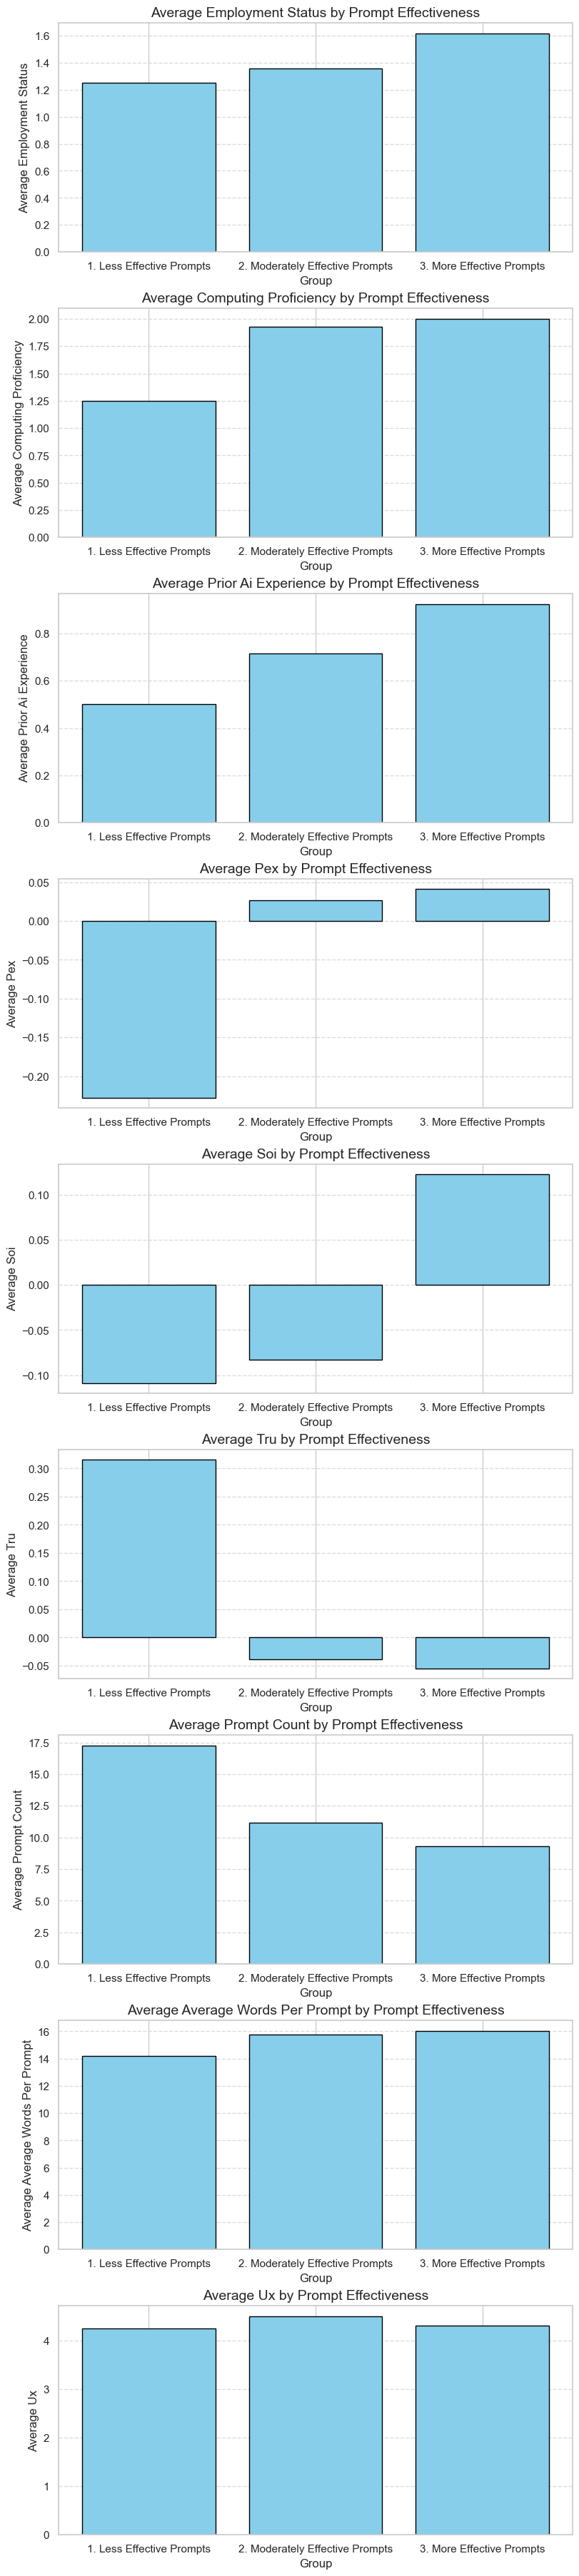

In [74]:
import matplotlib.pyplot as plt

# List of features to visualize
features = [
    'employment_status', 
    'computing_proficiency',
    'prior_ai_experience',
    'PEX',
    'SOI',
    'TRU',
    'Prompt_count',
    'Average_Words_per_Prompt',
    'UX'
]

# Set up the number of subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features), constrained_layout=True)

# Create a bar plot for each feature
for ax, feature in zip(axes, features):
    ax.bar(grouped['Group'], grouped[feature], color='skyblue', edgecolor='black')
    ax.set_title(f'Average {feature.replace("_", " ").title()} by Prompt Effectiveness', fontsize=14)
    ax.set_xlabel('Group', fontsize=12)
    ax.set_ylabel(f'Average {feature.replace("_", " ").title()}', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.show()


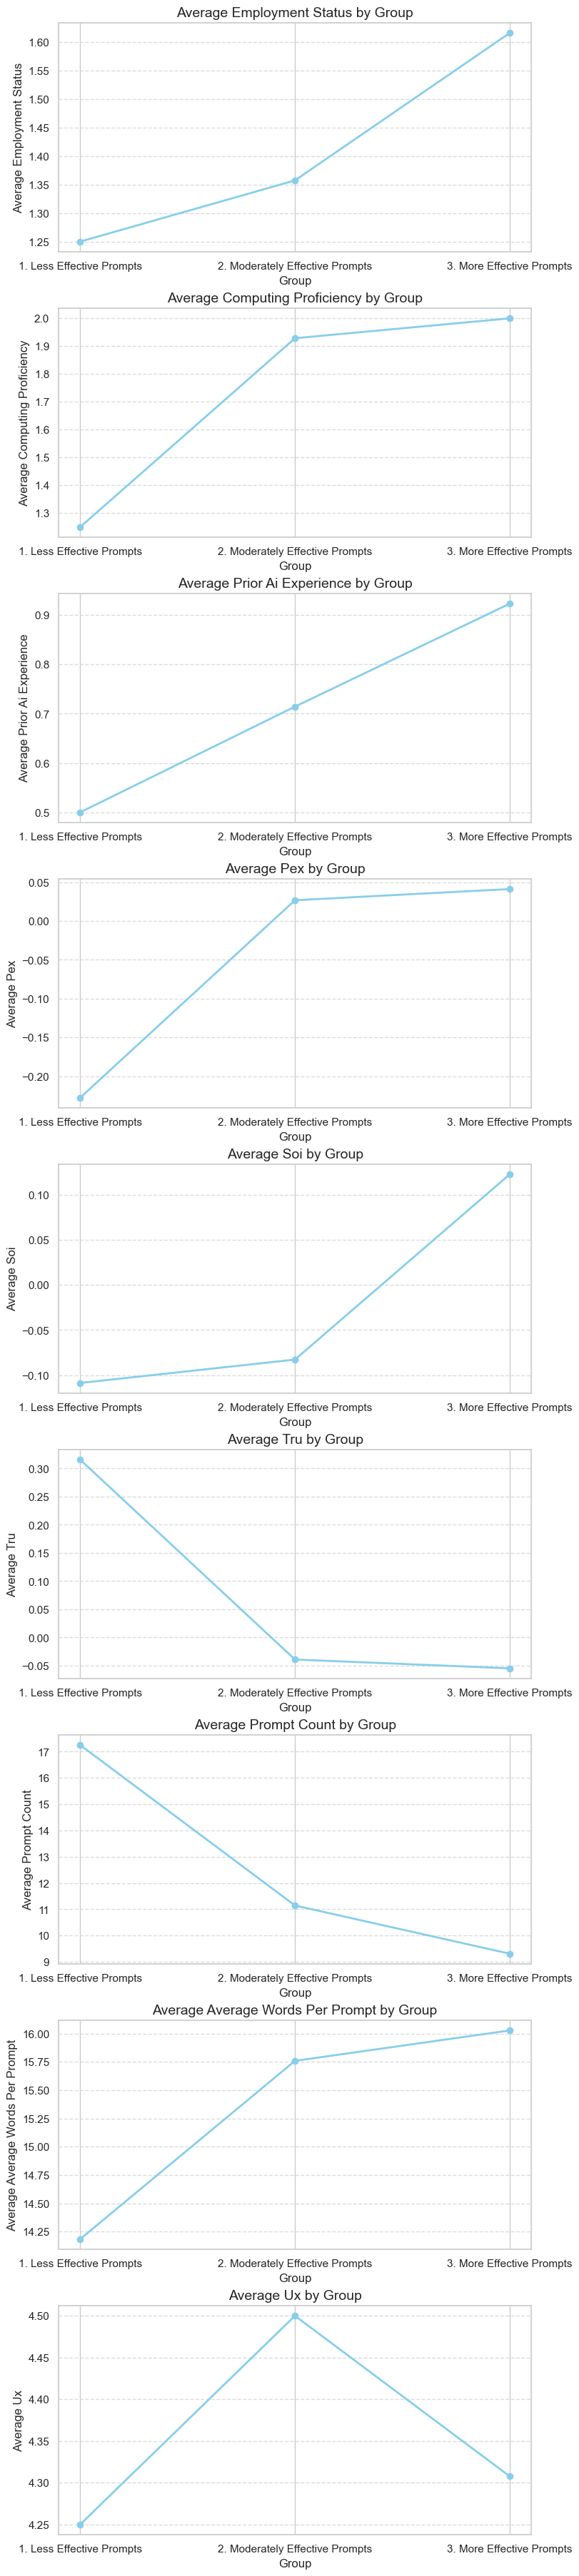

In [75]:
# Set up the number of subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features), constrained_layout=True)

# Create a line plot for each feature
for ax, feature in zip(axes, features):
    ax.plot(grouped['Group'], grouped[feature], marker='o', color='skyblue', linestyle='-', linewidth=2)
    ax.set_title(f'Average {feature.replace("_", " ").title()} by Group', fontsize=14)
    ax.set_xlabel('Group', fontsize=12)
    ax.set_ylabel(f'Average {feature.replace("_", " ").title()}', fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.show()


In [76]:

group1 = ['P3', 'P4', 'P5', 'P6', 'P7', 'P10', 'P12', 'P13', 'P15', 'P17', 'P19', 'P21', 'P22', 'P26', 'P29', 'P30', 'P31'] 
group2 = ['P2', 'P8', 'P11', 'P14', 'P16', 'P23', 'P27', 'P28'] 
group3 = ['P1', 'P9', 'P18', 'P25']
group4 = ['P20', 'P24']  

# Define a function to categorize participants
def assign_group(participant_no):
    if participant_no in group1:
        return 'Approach 1'
    elif participant_no in group2:
        return 'Approach 2'
    elif participant_no in group3:
        return 'Approach 3'
    elif participant_no in group4:
        return 'Approach 4'
    else:
        return 'Other'

# Add a new column for groups
df_encoded2['Group'] = df_encoded2['Participant'].apply(assign_group)

# Group by 'Group' and analyze features
grouped = df_encoded2.groupby('Group').agg({
    'highest_education': 'mean',  
    'employment_status': 'mean',  
    'computing_proficiency': ['mean', 'std'],  # Average and std deviation of computing proficiency
    'prior_ai_experience': 'mean',             # Total count of prior AI experience
    'PEX': 'mean', 
    'EEX': 'mean', 
    'SOI': 'mean', 
    'SEF': 'mean', 
    'TRU': 'mean',
    'Prompt_count': 'mean',                    # Mean and total prompt count
    'Average_Words_per_Prompt': 'mean',       # Mean words per prompt
    'Prompt_readability': 'mean', 
    'lexical_diversity_index': 'mean',        # Mean lexical diversity
    'Errors_per_ Word': 'mean',               # Total errors
    'UX': 'mean',                             # Average UX score
}).reset_index()

# Display the grouped analysis
print(grouped)


        Group highest_education employment_status computing_proficiency  \
                           mean              mean                  mean   
0  Approach 1          1.588235          1.647059              1.764706   
1  Approach 2          1.250000          1.000000              2.000000   
2  Approach 3          1.750000          1.250000              2.500000   
3  Approach 4          1.500000          2.000000              1.000000   

            prior_ai_experience       PEX       EEX       SOI       SEF  \
        std                mean      mean      mean      mean      mean   
0  0.903425            0.882353  0.230431 -0.063705 -0.025704 -0.259436   
1  0.755929            0.875000 -0.291313  0.233992  0.137221  0.492146   
2  0.577350            0.500000 -0.409372 -0.101031  0.431815  0.178670   
3  0.000000            0.000000  0.025331 -0.192412 -1.194026 -0.120714   

        TRU Prompt_count Average_Words_per_Prompt Prompt_readability  \
       mean         mean  

In [77]:
# Group by 'Group' and analyze features
grouped = df_encoded2.groupby('Group').agg({
    'prior_ai_experience': 'mean',             # Total count of prior AI experience
    'Average_Words_per_Prompt': 'mean',       # Mean words per prompt
    'Errors_per_ Word': 'mean',               # Total errors
    'UX': 'mean',                             # Average UX score
}).reset_index()

# Display the grouped analysis
print(grouped)


        Group  prior_ai_experience  Average_Words_per_Prompt  \
0  Approach 1             0.882353                 18.332679   
1  Approach 2             0.875000                 15.530193   
2  Approach 3             0.500000                  9.563447   
3  Approach 4             0.000000                  5.777778   

   Errors_per_ Word        UX  
0          0.060312  4.441176  
1          0.056457  4.437500  
2          0.062552  4.375000  
3          0.096154  3.750000  


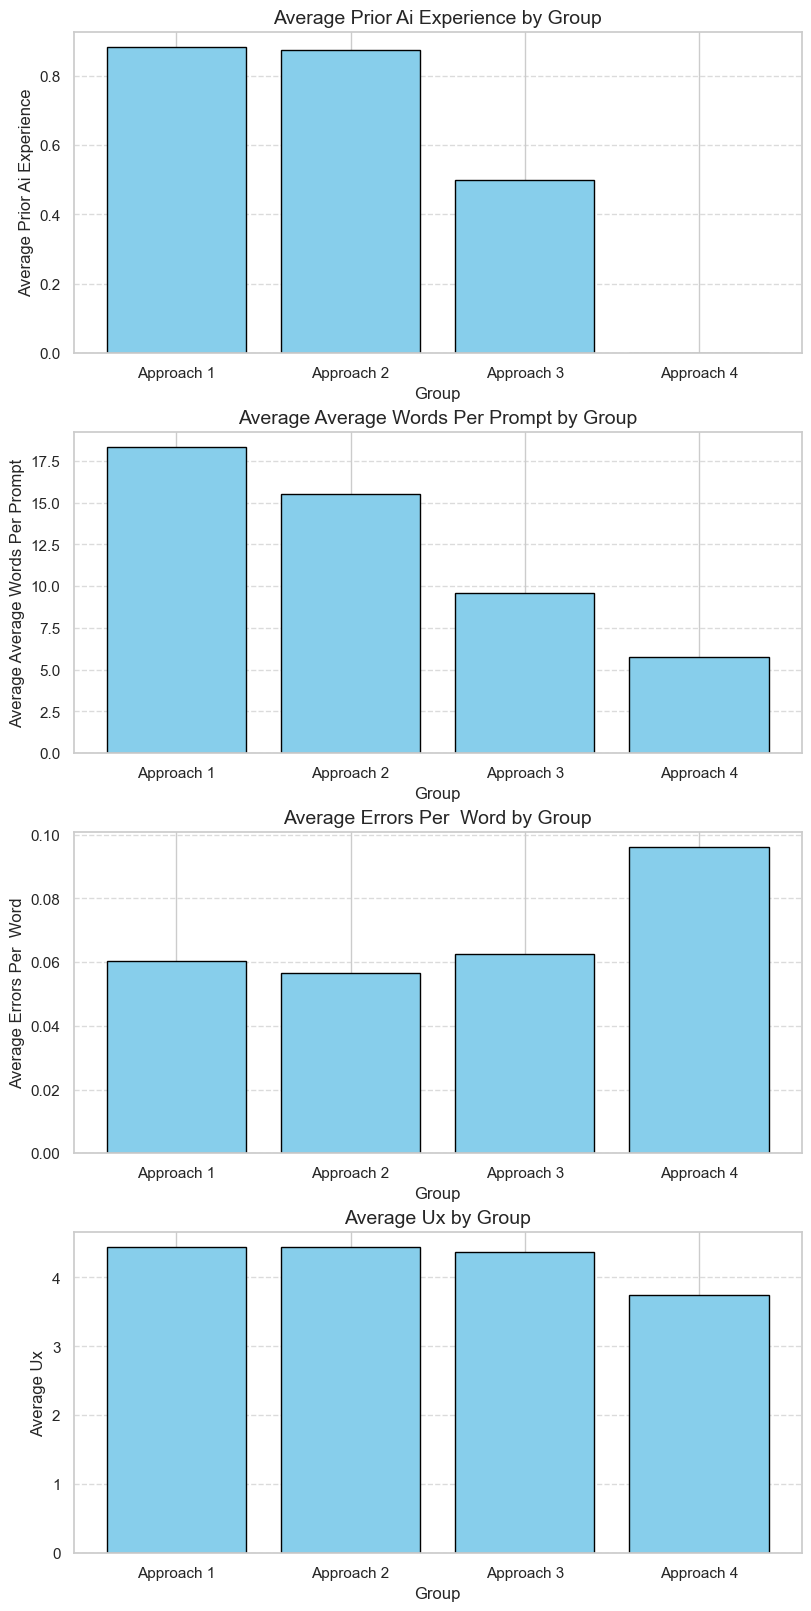

In [78]:
# List of features to visualize
features = [
    'prior_ai_experience',
    'Average_Words_per_Prompt',
    'Errors_per_ Word',
    'UX'
]

# Set up the number of subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features), constrained_layout=True)

# Create a bar plot for each feature
for ax, feature in zip(axes, features):
    ax.bar(grouped['Group'], grouped[feature], color='skyblue', edgecolor='black')
    ax.set_title(f'Average {feature.replace("_", " ").title()} by Group', fontsize=14)
    ax.set_xlabel('Group', fontsize=12)
    ax.set_ylabel(f'Average {feature.replace("_", " ").title()}', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.show()

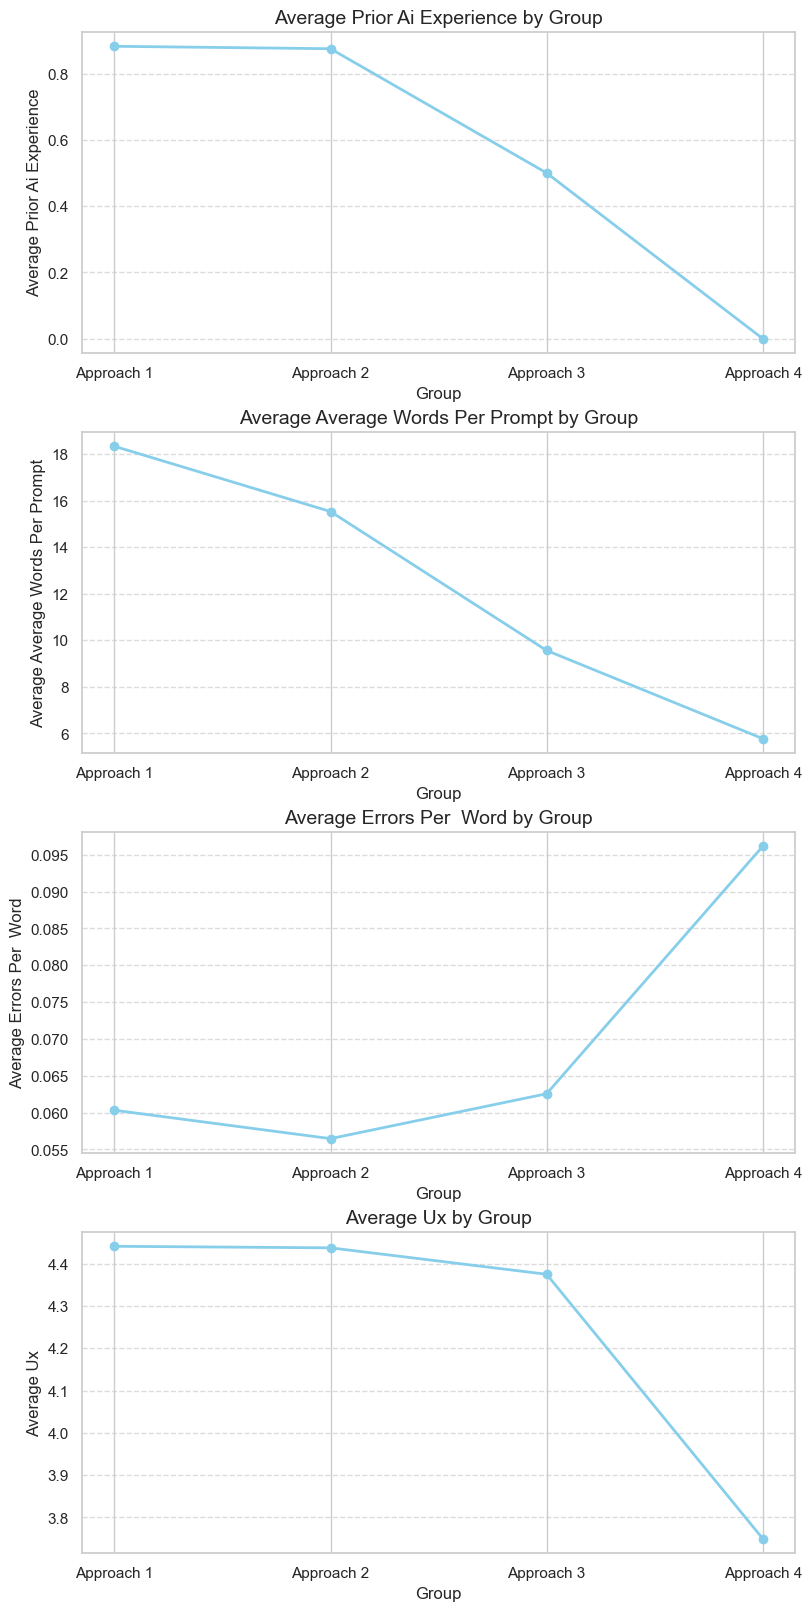

In [79]:
# Set up the number of subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features), constrained_layout=True)

# Create a line plot for each feature
for ax, feature in zip(axes, features):
    ax.plot(grouped['Group'], grouped[feature], marker='o', color='skyblue', linestyle='-', linewidth=2)
    ax.set_title(f'Average {feature.replace("_", " ").title()} by Group', fontsize=14)
    ax.set_xlabel('Group', fontsize=12)
    ax.set_ylabel(f'Average {feature.replace("_", " ").title()}', fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.show()


In [80]:

group1 = ['P3', 'P4', 'P5', 'P6', 'P7', 'P10', 'P12', 'P13', 'P15', 'P17', 'P19', 'P21', 'P22', 'P26', 'P29', 'P30', 'P31'] 
group2 = ['P2', 'P8', 'P11', 'P14', 'P16', 'P23', 'P25', 'P27', 'P28'] 
group3 = ['P1', 'P9', 'P18']
group4 = ['P20', 'P24']  

# Define a function to categorize participants
def assign_group(participant_no):
    if participant_no in group1:
        return 'Approach 1'
    elif participant_no in group2:
        return 'Approach 2'
    elif participant_no in group3:
        return 'Approach 3'
    elif participant_no in group4:
        return 'Approach 4'
    else:
        return 'Other'

# Add a new column for groups
df_encoded['Group'] = df_encoded['Participant'].apply(assign_group)

# Group by 'Group' and analyze features
grouped = df_encoded.groupby('Group').agg({
    'highest_education': 'mean',  
    'employment_status': 'mean',  
    'computing_proficiency': ['mean', 'std'],  # Average and std deviation of computing proficiency
    'prior_ai_experience': 'mean',             # Total count of prior AI experience
    'PEX': 'mean', 
    'EEX': 'mean', 
    'SOI': 'mean', 
    'SEF': 'mean', 
    'TRU': 'mean',
    'Prompt_count': 'mean',                    # Mean and total prompt count
    'Average_Words_per_Prompt': 'mean',       # Mean words per prompt
    'Prompt_readability': 'mean', 
    'lexical_diversity_index': 'mean',        # Mean lexical diversity
    'Errors_per_ Word': 'mean',               # Total errors
    'UX': 'mean',                             # Average UX score
}).reset_index()

# Display the grouped analysis
print(grouped)


        Group highest_education employment_status computing_proficiency  \
                           mean              mean                  mean   
0  Approach 1          1.588235          1.647059              1.764706   
1  Approach 2          1.333333          1.000000              2.111111   
2  Approach 3          1.666667          1.333333              2.333333   
3  Approach 4          1.500000          2.000000              1.000000   

            prior_ai_experience       PEX       EEX       SOI       SEF  \
        std                mean      mean      mean      mean      mean   
0  0.903425            0.882353  0.230431 -0.063705 -0.025704 -0.259436   
1  0.781736            0.888889 -0.389582  0.264780  0.146160  0.439709   
2  0.577350            0.333333 -0.153916 -0.305069  0.503194  0.231489   
3  0.000000            0.000000  0.025331 -0.192412 -1.194026 -0.120714   

        TRU Prompt_count Average_Words_per_Prompt Prompt_readability  \
       mean         mean  

In [81]:
df_encoded.head()

,Participant,ParticipantNo,age_group,gender,highest_education,employment_status,computing_proficiency,prior_ai_experience,PEX,EEX,...,Average_Words_per_Prompt,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index,Error_Count,Errors_per_ Word,UX,Group
0,P1,1,2.0,Male,2.0,1.0,3.0,1.0,0.879498,0.182772,...,-0.565910,-0.405764,-0.449427,-1.004936,-0.812194,-0.783810,-0.861836,-1.166373,-0.733519,Approach 3
1,P2,2,2.0,Male,2.0,0.0,2.0,1.0,-0.851861,0.435111,...,-0.539183,-0.640681,-0.671751,-0.154790,-2.541709,-1.190867,-0.861836,-1.132669,-2.628442,Approach 2
2,P3,3,2.0,Male,2.0,2.0,2.0,1.0,0.638797,-0.591977,...,1.665794,1.089157,1.057429,0.965163,0.093657,0.180197,0.575467,0.102135,0.213943,Approach 1
3,P4,4,3.0,Female,1.0,2.0,0.0,1.0,-0.913555,-1.170715,...,0.563305,-0.544578,-0.227104,0.572161,0.752945,1.146846,0.068183,0.874270,-0.733519,Approach 1
4,P5,5,0.0,Male,1.0,2.0,2.0,1.0,0.549950,0.359166,...,-0.749180,-1.003733,-0.992884,1.960903,1.460474,-0.065436,-0.861836,-1.041162,0.213943,Approach 1


# Participant Details

In [82]:
# Rearang Columns
df=df[['CaseNo', 'ParticipantNo', 'Participant', 'age_group', 'gender', 'highest_education',
       'employment_status', 'computing_proficiency', 'prior_ai_experience', 'ai_usage_capacity', 
       'ITU', 'SAT', 'liked_most', 'challenges_faced','suggestions', 'PEX_mean', 'EEX_mean',
       'SOI_mean', 'SEF_mean', 'TRU_mean']]

In [83]:
df.head()

,CaseNo,ParticipantNo,Participant,age_group,gender,highest_education,employment_status,computing_proficiency,prior_ai_experience,ai_usage_capacity,ITU,SAT,liked_most,challenges_faced,suggestions,PEX_mean,EEX_mean,SOI_mean,SEF_mean,TRU_mean
0,1,1,P1,35-44,Male,Postgraduate Degree,Employed part-time,Expert,Yes,"For work or professional tasks, For academic o...",4,4,Code generation,.,.,4.000000,5.000000,4.0,5.000000,3.333333
1,3,2,P2,35-44,Male,Postgraduate Degree,Student,Advanced,Yes,For personal interest or tasks,3,3,Readily available information in ChatGPT,Secured internet connection,No,3.666667,4.000000,4.0,3.000000,3.000000
2,6,3,P3,35-44,Male,Postgraduate Degree,Employed full-time,Advanced,Yes,For academic or research purposes,4,5,scheduling the trip and suggesting the places ...,sometimes it gives the same answer several tim...,better if ChatGPT can provide links (Web link)...,5.000000,5.000000,3.0,4.666667,3.000000
3,7,4,P4,45-54,Female,College Graduate,Employed full-time,Novice,Yes,For work or professional tasks,4,4,it is easy to use and give more details withou...,to select best option,none,4.666667,4.333333,2.0,4.333333,3.000000
4,8,5,P5,18-24,Male,College Graduate,Employed full-time,Advanced,Yes,"For work or professional tasks, For academic o...",5,4,Ease of Use.,Writing a prompt that conveys the needed result.,NaN,4.333333,5.000000,4.0,4.000000,3.666667


In [84]:
df[['CaseNo','ParticipantNo']]

,CaseNo,ParticipantNo
0,1,1
1,3,2
2,6,3
3,7,4
4,8,5
5,9,6
6,10,7
7,11,8
8,12,9
9,13,10


In [85]:
participant_details=df[df['CaseNo']==7].iloc[0,2:10]

participant_details.index=[ 'Participant','Age Group', 'Gender', 'Highest Education Qualification',
       'Employment Status', 'Computing Proficiency', 'Prior GenAI Experience', 'prior AI usage capacity']

participant_details


Participant                                                    P4
Age Group                                                   45-54
Gender                                                     Female
Highest Education Qualification                  College Graduate
Employment Status                              Employed full-time
Computing Proficiency                                      Novice
Prior GenAI Experience                                        Yes
prior AI usage capacity            For work or professional tasks
Name: 3, dtype: object

In [86]:
participant_details.to_clipboard()